In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from __future__ import print_function
import seaborn as sns
from matplotlib.ticker import NullFormatter, MaxNLocator
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import scipy as sp
from itertools import chain
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy import spatial
from scipy.spatial import ConvexHull
from scipy.optimize import curve_fit
from matplotlib import path
from scipy.stats import probplot,shapiro, sem
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import cm
from numpy import linspace
import pylab
import os
from scipy.ndimage import gaussian_filter

# initialization steps

In [2]:
#protamine details
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for salmon
salmon_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_rg.csv").iloc[:,:3]
salmon_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_ree.csv")
salmon_rg_ree=pd.concat([salmon_rg,salmon_ree['Ree']],axis=1)
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=2]
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=11]
#this step is because some salmon simulations have more than 200ns
temp_df=salmon_rg_ree.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_rg_ree=temp_df.copy()
del temp_df
#this step is taking last 40000 frames i.e. equilibrated portion
blank_df = pd.DataFrame()
for sim in salmon_rg_ree.sim.unique():
    temp_df = salmon_rg_ree[salmon_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_rg_ree = blank_df.copy()
del blank_df
del temp_df
del salmon_rg, salmon_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for p1
p1_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_rg.csv")
p1_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_ree.csv")
p1_rg_ree=pd.concat([p1_rg,p1_ree['Ree']],axis=1)
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=15]
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree.sim.unique():
    temp_df = p1_rg_ree[p1_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree = blank_df.copy()
del blank_df
del temp_df
del p1_rg, p1_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for bull
bull_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Rg_master_out.csv")
bull_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree['Ree']],axis=1)
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=14]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=15]
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()

del blank_df
del temp_df
del bull_rg, bull_ree

In [3]:
#human P1 protamine ESFF1 13 simulations
#drop the same trajectories as ff14sb 13 simulations
#use equilibrated region same region as ff14sb

p1_rg_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Rg_master_out.csv')
p1_ree_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Ree_master_out.csv')
p1_rg_ree_esff1=pd.concat([p1_rg_esff1,p1_ree_esff1['Ree']],axis=1)
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=15]
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree_esff1.sim.unique():
    temp_df = p1_rg_ree_esff1[p1_rg_ree_esff1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree_esff1 = blank_df.copy()
del blank_df
del temp_df
del p1_rg_esff1, p1_ree_esff1


In [4]:
#the long simulations 
salmon_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Rg_eighth_oldff.csv')                                                                    
salmon_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Ree_eighth_oldff.csv')                                                                  
salmon_rg_ree_oldff=pd.concat([salmon_rg_oldff,salmon_ree_oldff['Ree']],axis=1)                                                  
salmon_rg_ree_oldff['ratio']=salmon_rg_ree_oldff.Ree.values**2/salmon_rg_ree_oldff.Rg.values**2                                  

p1_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Rg_eighth_oldff.csv')                                                                    
p1_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Ree_eighth_oldff.csv')                                                                  
p1_rg_ree_oldff=pd.concat([p1_rg_oldff,p1_ree_oldff['Ree']],axis=1)                                                  
p1_rg_ree_oldff['ratio']=p1_rg_ree_oldff.Ree.values**2/p1_rg_ree_oldff.Rg.values**2                                  

bull_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Rg_fourth_oldff.csv')                                                                    
bull_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Ree_fourth_oldff.csv')                                                                  
bull_rg_ree_oldff=pd.concat([bull_rg_oldff,bull_ree_oldff['Ree']],axis=1)     
bull_rg_ree_oldff['ratio']=bull_rg_ree_oldff.Ree.values**2/bull_rg_ree_oldff.Rg.values**2                                  

#use below two dataframes for plotting                                                                               

del salmon_rg_oldff, salmon_ree_oldff,p1_rg_oldff, p1_ree_oldff, bull_rg_oldff, bull_ree_oldff
  

In [5]:
#protamine details (only for salmon dataframe i added Rg/Rg_mean)
salmon_rg_ree_ratheatmap=salmon_rg_ree.copy()
salmon_rg_ree_ratheatmap['ratio']=salmon_rg_ree_ratheatmap.Ree.values**2/salmon_rg_ree_ratheatmap.Rg.values**2
del salmon_rg_ree

test=salmon_rg_ree_ratheatmap.copy()
temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']    
salmon_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

In [6]:
#protamine details
p1_rg_ree_ratheatmap=p1_rg_ree.copy()
p1_rg_ree_ratheatmap['ratio']=p1_rg_ree_ratheatmap.Ree.values**2/p1_rg_ree_ratheatmap.Rg.values**2
del p1_rg_ree
p1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,28.1333,70.9610,6.362065
60001,60002,1,28.0252,71.5204,6.512720
60002,60003,1,28.0709,70.5204,6.311271
60003,60004,1,27.8865,69.2119,6.159898
60004,60005,1,27.9361,69.9112,6.262705
...,...,...,...,...,...
1399995,99996,14,23.9297,69.6266,8.465953
1399996,99997,14,23.8227,69.1996,8.437722
1399997,99998,14,23.6595,68.5624,8.397710
1399998,99999,14,23.7770,69.0513,8.433922


In [7]:
#protamine details
p1_rg_ree_esff1_ratheatmap=p1_rg_ree_esff1.copy()
p1_rg_ree_esff1_ratheatmap['ratio']=p1_rg_ree_esff1_ratheatmap.Ree.values**2/p1_rg_ree_esff1_ratheatmap.Rg.values**2
del p1_rg_ree_esff1
p1_rg_ree_esff1_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,30.0090,76.5885,6.513645
60001,60002,1,29.9954,76.3078,6.471852
60002,60003,1,30.0475,75.8204,6.367302
60003,60004,1,29.8249,77.0204,6.668890
60004,60005,1,30.1068,78.4066,6.782285
...,...,...,...,...,...
1399995,99996,14,31.3949,92.7101,8.720390
1399996,99997,14,31.3185,92.2405,8.674439
1399997,99998,14,31.5128,93.0468,8.718242
1399998,99999,14,31.5500,92.3367,8.565446


In [8]:
#protamine details
bull_rg_ree_ratheatmap=bull_rg_ree.copy()
bull_rg_ree_ratheatmap['ratio']=bull_rg_ree_ratheatmap.Ree.values**2/bull_rg_ree_ratheatmap.Rg.values**2
del bull_rg_ree
bull_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,24.4750,55.0058,5.050933
60001,60002,1,24.5678,56.4126,5.272538
60002,60003,1,24.5493,56.1438,5.230285
60003,60004,1,24.8113,56.7690,5.235082
60004,60005,1,25.0404,57.1523,5.209366
...,...,...,...,...,...
1299995,99996,13,25.9520,62.3499,5.772047
1299996,99997,13,25.9814,62.1708,5.725953
1299997,99998,13,25.8608,61.9394,5.736541
1299998,99999,13,25.8253,62.1201,5.785935


In [9]:
#salmon tensors received and converted to moments at below directory. only equilibrated region for moments for time
salmon_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/salmon_moments_equilibrated.csv')
salmon_moments.insert(0,salmon_rg_ree_ratheatmap.columns[0],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[0]].values)
salmon_moments.insert(1,salmon_rg_ree_ratheatmap.columns[1],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[1]].values)
salmon_moments.insert(2,salmon_rg_ree_ratheatmap.columns[2],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[2]].values)


salmon_R1=salmon_moments.R1.values
salmon_R2=salmon_moments.R2.values
salmon_R3=salmon_moments.R3.values
salmon_Rg=(salmon_R1+salmon_R2+salmon_R3)**0.5
salmon_moments['asphericity']=(salmon_R1) - ((0.5) * ((salmon_R2) + (salmon_R3)))
salmon_moments['acylindricity']=(salmon_R2) - (salmon_R3)
salmon_moments['RSA'] = ((salmon_moments.asphericity.values**2) + (0.75*(salmon_moments.acylindricity.values**2)))/(salmon_Rg**4)
del salmon_R1, salmon_R2, salmon_R3, salmon_Rg


#p1 tensors received and converted to moments at below directory. only equilibrated region for moments for time
p1_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/p1_moments_equilibrated.csv')
p1_moments.insert(0,p1_rg_ree_ratheatmap.columns[0],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[0]].values)
p1_moments.insert(1,p1_rg_ree_ratheatmap.columns[1],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[1]].values)
p1_moments.insert(2,p1_rg_ree_ratheatmap.columns[2],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[2]].values)

p1_R1=p1_moments.R1.values
p1_R2=p1_moments.R2.values
p1_R3=p1_moments.R3.values
p1_Rg=(p1_R1+p1_R2+p1_R3)**0.5
p1_moments['asphericity']=(p1_R1) - ((0.5) * ((p1_R2) + (p1_R3)))
p1_moments['acylindricity']=(p1_R2) - (p1_R3)
p1_moments['RSA'] = ((p1_moments.asphericity.values**2) + (0.75*(p1_moments.acylindricity.values**2)))/(p1_Rg**4)
del p1_R1, p1_R2, p1_R3, p1_Rg


#bull tensors received and converted to moments at below directory. only equilibrated region for moments for time
bull_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/bull_moments_equilibrated.csv')
bull_moments.insert(0,bull_rg_ree_ratheatmap.columns[0],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[0]].values)
bull_moments.insert(1,bull_rg_ree_ratheatmap.columns[1],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[1]].values)
bull_moments.insert(2,bull_rg_ree_ratheatmap.columns[2],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[2]].values)
bull_R1=bull_moments.R1.values
bull_R2=bull_moments.R2.values
bull_R3=bull_moments.R3.values
bull_Rg=(bull_R1+bull_R2+bull_R3)**0.5
bull_moments['asphericity']=(bull_R1) - ((0.5) * ((bull_R2) + (bull_R3)))
bull_moments['acylindricity']=(bull_R2) - (bull_R3)
bull_moments['RSA'] = ((bull_moments.asphericity.values**2) + (0.75*(bull_moments.acylindricity.values**2)))/(bull_Rg**4)
del bull_R1, bull_R2, bull_R3, bull_Rg



In [10]:
salmon_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,26.1041,639.320359,29.635872,12.468669,618.268089,17.167203,0.823699
1,60002,1,25.8683,628.822750,28.431834,11.914016,608.649825,16.517819,0.827759
2,60003,1,25.9168,632.701039,27.210635,11.768426,613.211508,15.442209,0.833877
3,60004,1,25.9136,633.831913,26.351048,11.333339,614.989720,15.017709,0.839106
4,60005,1,25.9379,633.155388,26.860646,12.756666,613.346732,14.103980,0.831472
...,...,...,...,...,...,...,...,...,...
519995,99996,15,18.5986,289.898603,42.690007,13.319490,261.893855,29.370517,0.578637
519996,99997,15,18.6897,291.742781,44.029569,13.533850,262.961071,30.495719,0.572439
519997,99998,15,18.7345,292.589463,45.065449,13.327688,263.392894,31.737762,0.569299
519998,99999,15,18.7678,294.566483,44.133938,13.530279,265.734375,30.603659,0.574831


In [11]:
bull_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,24.4750,553.782676,31.293834,13.947590,531.161964,17.346244,0.786887
1,60002,1,24.5678,557.928541,31.484898,14.161761,535.105212,17.323136,0.786605
2,60003,1,24.5493,559.257751,29.346161,14.062388,537.553476,15.283773,0.796073
3,60004,1,24.8113,573.322884,28.669697,13.608519,552.183776,15.061178,0.805028
4,60005,1,25.0404,583.352172,30.432837,13.236391,561.517558,17.196446,0.802541
...,...,...,...,...,...,...,...,...,...
519995,99996,13,25.9520,624.948670,33.652810,14.905619,600.669455,18.747191,0.795983
519996,99997,13,25.9814,625.943638,34.442536,14.644726,601.400006,19.797810,0.794387
519997,99998,13,25.8608,621.268264,32.649439,14.861297,597.512896,17.788142,0.798763
519998,99999,13,25.8253,621.982272,31.603657,13.361472,599.499707,18.242185,0.808530


In [12]:
p1_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,28.1333,735.167983,44.158809,12.155908,707.010624,32.002900,0.799164
1,60002,1,28.0252,728.028439,45.307523,12.074138,699.337608,33.233384,0.794174
2,60003,1,28.0709,728.851449,46.731091,12.393260,699.289274,34.337831,0.788992
3,60004,1,27.8865,717.878466,47.014979,12.764155,687.988898,34.250824,0.784138
4,60005,1,27.9361,722.026616,45.983290,12.416294,692.826824,33.566996,0.789495
...,...,...,...,...,...,...,...,...,...
519995,99996,14,23.9297,539.608244,18.806862,14.217194,523.096216,4.589668,0.834520
519996,99997,14,23.8227,534.683491,17.852470,14.982840,518.265836,2.869630,0.833978
519997,99998,14,23.6595,527.254466,17.695328,14.819906,510.996850,2.875422,0.833351
519998,99999,14,23.7770,532.609284,17.569947,15.166769,516.240926,2.403179,0.833841


In [13]:
bull_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,24.4750,553.782676,31.293834,13.947590,531.161964,17.346244,0.786887
1,60002,1,24.5678,557.928541,31.484898,14.161761,535.105212,17.323136,0.786605
2,60003,1,24.5493,559.257751,29.346161,14.062388,537.553476,15.283773,0.796073
3,60004,1,24.8113,573.322884,28.669697,13.608519,552.183776,15.061178,0.805028
4,60005,1,25.0404,583.352172,30.432837,13.236391,561.517558,17.196446,0.802541
...,...,...,...,...,...,...,...,...,...
519995,99996,13,25.9520,624.948670,33.652810,14.905619,600.669455,18.747191,0.795983
519996,99997,13,25.9814,625.943638,34.442536,14.644726,601.400006,19.797810,0.794387
519997,99998,13,25.8608,621.268264,32.649439,14.861297,597.512896,17.788142,0.798763
519998,99999,13,25.8253,621.982272,31.603657,13.361472,599.499707,18.242185,0.808530


In [14]:
#BE CAREFUL with working directory for this first part of code
#-------
#only SAW_equil_chain_rg_ree was changed to SAW_SAW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/SAW/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/SAW/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        SAW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=running_df.copy()
    else:
        SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=pd.concat([summary_df_SAW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_SAW=summary_df_SAW.round({'epas':2})
SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.round({'epas':2})


In [15]:
#BE CAREFUL with working directory for this first part of code
#-------
#only RW_equil_chain_rg_ree was changed to RW_RW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        RW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=running_df.copy()
    else:
        RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=pd.concat([summary_df_RW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_RW=summary_df_RW.round({'epas':2})
RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.round({'epas':2})


In [16]:
#PEI code
pei_ratheatmap=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_Rg_Ree_master_out.csv")
pei_ratheatmap['ratio']=pei_ratheatmap.Ree.values**2/pei_ratheatmap.Rg.values**2

test=pei_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.proton.unique():
    temp_rg_mean.append(list(np.repeat(test[test.proton==sim]['Rg'].mean(),
                                 test[test.proton==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

pei_ratheatmap=test.copy()
del test, temp_rg_mean

In [17]:
pei_ratheatmap

,frames,proton,frames2,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,0,1,8.3521,18.3635,4.834144,8.618204,0.969123
1,2,0,2,8.4664,18.7833,4.922052,8.618204,0.982386
2,3,0,3,8.5173,18.8147,4.879673,8.618204,0.988292
3,4,0,4,8.7129,20.7722,5.683810,8.618204,1.010988
4,5,0,5,8.6367,19.4532,5.073252,8.618204,1.002146
...,...,...,...,...,...,...,...,...
405004,44997,40,44997,28.6018,79.4041,7.707244,31.801804,0.899377
405005,44998,40,44998,28.6281,80.9322,7.992040,31.801804,0.900204
405006,44999,40,44999,28.6173,80.9547,8.002521,31.801804,0.899864
405007,45000,40,45000,28.4727,80.3615,7.965972,31.801804,0.895317


# formula from 2012 macromolecules elder jayaraman paper
$$
asphericity=(R_1)-\frac{1}{2}(R_2+R_3) \\  
acylindricity=(R_2-R_3) \\
RSA=\frac{asphericity^2 + 0.75acylindricity^2}{R_g^4}
$$

In [18]:
#double check RSA definitions!!! (have been double checked)
pei_moments=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_moments.csv")
pei_tensor=pd.read_csv("/home/hshadman/caleb_cyu1/pei_tensor/pei_tensor_master_out.csv")
pei_moments.insert(0,pei_tensor.columns[0],pei_tensor[pei_tensor.columns[0]])
pei_moments.insert(1,pei_tensor.columns[1],pei_tensor[pei_tensor.columns[1]])
pei_moments.insert(2,pei_tensor.columns[2],pei_tensor[pei_tensor.columns[2]])
pei_R1=pei_moments.R1.values
pei_R2=pei_moments.R2.values
pei_R3=pei_moments.R3.values
pei_Rg=pei_moments.Rg.values
pei_moments['asphericity']=(pei_R1) - ((0.5) * ((pei_R2) + (pei_R3)))
pei_moments['acylindricity']=(pei_R2) - (pei_R3)
pei_moments['RSA'] = ((pei_moments.asphericity.values**2) + (0.75*(pei_moments.acylindricity.values**2)))/(pei_Rg**4)
del pei_tensor, pei_R1, pei_R2, pei_R3, pei_Rg
pei_moments


,frames,proton,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,1,0,8.3521,43.587836,16.815992,9.353872,30.502903,7.462120,0.199787
1,2,0,8.4664,46.554398,16.365420,8.759282,33.992047,7.606138,0.233329
2,3,0,8.5173,47.152627,16.082634,9.308639,34.456990,6.773995,0.232144
3,4,0,8.7129,50.970942,16.874182,8.068876,38.499413,8.805307,0.267282
4,5,0,8.6367,49.849475,16.940788,7.803137,37.477512,9.137651,0.263690
...,...,...,...,...,...,...,...,...,...
405004,19996,40,28.6018,700.224361,90.760200,27.081239,641.303641,63.678961,0.619090
405005,19997,40,28.6281,701.198069,89.147883,29.223248,642.012503,59.924635,0.617654
405006,19998,40,28.6173,701.951787,88.007303,28.990510,643.452881,59.016794,0.621227
405007,19999,40,28.4727,694.876275,90.961365,24.857160,636.967013,66.104205,0.622319


In [19]:
GW_ind_runs_chainlen25 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_25_6_runs.csv')
GW_ind_runs_chainlen100 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_2 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/2nd_time_gaussian_single_chain_length_100_9_runs.csv')
GW_ind_runs_chainlen100_3 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/3rd_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_4 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/4th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_5 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/5th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_6 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/6th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_7 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/7th_time_gaussian_single_chain_length_100_15_runs.csv')
GW_ind_runs_chainlen100_8 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/8th_time_gaussian_single_chain_length_100_10_runs.csv')
GW_ind_runs_chainlen150 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_150_6_runs.csv')

#add rg/rg_mean column for each dataframe saved

#first the GW_ind_runs_chainlen25 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen25.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen25=test.copy()
del test, temp_rg_mean

#second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100=test.copy()
del test, temp_rg_mean

#second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_2.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_2=test.copy()

#second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_3.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_3=test.copy()

#second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_4.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_4=test.copy()


#second second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_5.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_5=test.copy()

#second second second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_6.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_6=test.copy()

#seventh the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_7.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_7=test.copy()

#eighth the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_8.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_8=test.copy()




#update run number in second  and 3rd and 4th dataframes of chain length 100
GW_ind_runs_chainlen100_2['run_number']= GW_ind_runs_chainlen100_2['run_number'] + GW_ind_runs_chainlen100['run_number'].max()
GW_ind_runs_chainlen100_3['run_number']= GW_ind_runs_chainlen100_3['run_number'] + GW_ind_runs_chainlen100_2['run_number'].max()
GW_ind_runs_chainlen100_4['run_number']= GW_ind_runs_chainlen100_4['run_number'] + GW_ind_runs_chainlen100_3['run_number'].max()
GW_ind_runs_chainlen100_5['run_number']= GW_ind_runs_chainlen100_5['run_number'] + GW_ind_runs_chainlen100_4['run_number'].max()
GW_ind_runs_chainlen100_6['run_number']= GW_ind_runs_chainlen100_6['run_number'] + GW_ind_runs_chainlen100_5['run_number'].max()
GW_ind_runs_chainlen100_7['run_number']= GW_ind_runs_chainlen100_7['run_number'] + GW_ind_runs_chainlen100_6['run_number'].max()
GW_ind_runs_chainlen100_8['run_number']= GW_ind_runs_chainlen100_8['run_number'] + GW_ind_runs_chainlen100_7['run_number'].max()
#combine the three dataframes
GW_ind_runs_chainlen100 = pd.concat([GW_ind_runs_chainlen100,
                                     GW_ind_runs_chainlen100_2,
                                    GW_ind_runs_chainlen100_3,
                                    GW_ind_runs_chainlen100_4,
                                    GW_ind_runs_chainlen100_5,
                                    GW_ind_runs_chainlen100_6,
                                    GW_ind_runs_chainlen100_7,
                                    GW_ind_runs_chainlen100_8],axis=0)
del test, temp_rg_mean,GW_ind_runs_chainlen100_2,GW_ind_runs_chainlen100_3,GW_ind_runs_chainlen100_4,GW_ind_runs_chainlen100_5,GW_ind_runs_chainlen100_6,GW_ind_runs_chainlen100_7,GW_ind_runs_chainlen100_8



#third the GW_ind_runs_chainlen150 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen150.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen150=test.copy()
del test, temp_rg_mean



In [20]:
#adding one extra cell, for GW_ind_runs_chainlen100 ONLY, calculating RSA for this data ONLY
GW_moments_ind_runs_100_=GW_ind_runs_chainlen100.copy()
GW_R1=GW_moments_ind_runs_100_.R1.values
GW_R2=GW_moments_ind_runs_100_.R2.values
GW_R3=GW_moments_ind_runs_100_.R3.values
GW_Rg=GW_moments_ind_runs_100_.Rg2.values**0.5
GW_moments_ind_runs_100_['asphericity']=(GW_R1) - ((0.5) * ((GW_R2) + (GW_R3)))
GW_moments_ind_runs_100_['acylindricity']=(GW_R2) - (GW_R3)
GW_moments_ind_runs_100_['RSA'] = ((GW_moments_ind_runs_100_.asphericity.values**2) + (0.75*(GW_moments_ind_runs_100_.acylindricity.values**2)))/(GW_Rg**4)
del GW_R1, GW_R2, GW_R3, GW_Rg


In [21]:
GW_equil_chain_rg_ree = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','Rend2','ratio']]
GW_moments = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','R1','R2','R3','asphericity','acylindricity','RSA']]
#GW_moments already has asphericity, acylindricity and RSA from csv file but we are replacing that and recalcualting

GW_R1=GW_moments.R1.values
GW_R2=GW_moments.R2.values
GW_R3=GW_moments.R3.values
GW_Rg=GW_moments.Rg2.values**0.5
GW_moments['asphericity']=(GW_R1) - ((0.5) * ((GW_R2) + (GW_R3)))
GW_moments['acylindricity']=(GW_R2) - (GW_R3)
GW_moments['RSA'] = ((GW_moments.asphericity.values**2) + (0.75*(GW_moments.acylindricity.values**2)))/(GW_Rg**4)
del GW_R1, GW_R2, GW_R3, GW_Rg



In [22]:
GW_moments

,chain_length,Rg2,R1,R2,R3,asphericity,acylindricity,RSA
0,25,7.616056,4.155140,2.723211,0.737705,2.424682,1.985506,0.152329
1,25,20.551210,14.695473,5.157975,0.697762,11.767605,4.460213,0.363196
2,25,9.356418,7.070639,1.706749,0.579030,5.927750,1.127718,0.412280
3,25,11.953089,6.314056,3.872324,1.766708,3.494540,2.105616,0.108745
4,25,9.817060,5.874690,3.032098,0.910272,3.903505,2.121826,0.193142
...,...,...,...,...,...,...,...,...
179995,150,44.698413,31.292708,9.880317,3.525389,24.589855,6.354928,0.317801
179996,150,60.146050,39.848506,15.352877,4.944666,29.699735,10.408211,0.266292
179997,150,150.051747,101.269815,41.461426,7.320506,76.878850,34.140920,0.301328
179998,150,35.779590,22.420734,7.826252,5.532605,15.741305,2.293647,0.196640


In [23]:
#adding a column of Rg/Rg_mean for GW ONLY
#careful about changing anything here
#only GW don't do this for RW and SAW having epas and chainlength complicates things
test=GW_equil_chain_rg_ree.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for chain_length in test.chain_length.unique():
    temp_rg_mean.append(list(np.repeat(test[test.chain_length==chain_length]['Rg'].mean(),
                                 test[test.chain_length==chain_length]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_equil_chain_rg_ree=test.copy()
del test, temp_rg_mean


In [24]:
#ab40_ff14SB (disordered)
#CAREFUL if using frame numbers -- they repeat
ab40_ff14sb_rg_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_noimage_master_out.csv")
ab40_ff14sb_ree_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_noimage_master_out.csv")
ab40_ff14sb_rg_ree_ratheatmap_noimage = pd.concat([ab40_ff14sb_rg_noimage.frames,
                                           ab40_ff14sb_rg_noimage.sim,
                                          ab40_ff14sb_rg_noimage.Rg,
                                          ab40_ff14sb_ree_noimage.Ree],axis=1)
ab40_ff14sb_rg_ree_ratheatmap_noimage['ratio']=ab40_ff14sb_rg_ree_ratheatmap_noimage.Ree**2/ab40_ff14sb_rg_ree_ratheatmap_noimage.Rg**2

test=ab40_ff14sb_rg_ree_ratheatmap_noimage.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ab40_ff14sb_rg_ree_ratheatmap_noimage=test.copy()
del test, temp_rg_mean

del ab40_ff14sb_rg_noimage, ab40_ff14sb_ree_noimage


In [25]:
ab40_ff14sb_rg_ree_ratheatmap_noimage

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,12.2309,25.2003,4.245165,11.445957,1.068578
1,2,1,11.9942,25.3262,4.458590,11.445957,1.047898
2,3,1,11.9456,24.6764,4.267246,11.445957,1.043652
3,4,1,11.9716,24.7641,4.278984,11.445957,1.045924
4,5,1,12.2128,25.6045,4.395437,11.445957,1.066997
...,...,...,...,...,...,...,...
199995,39996,5,12.4342,20.5347,2.727351,12.528669,0.992460
199996,39997,5,12.3406,20.5174,2.764217,12.528669,0.984989
199997,39998,5,12.2176,19.9619,2.669512,12.528669,0.975171
199998,39999,5,12.3548,20.9697,2.880799,12.528669,0.986122


In [26]:
ab40_ff14sb_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ab40_ff14sb_rg_noimage_moments.csv")

ab40_ff14sb_R1=ab40_ff14sb_moments.R1.values
ab40_ff14sb_R2=ab40_ff14sb_moments.R2.values
ab40_ff14sb_R3=ab40_ff14sb_moments.R3.values
ab40_ff14sb_Rg=(ab40_ff14sb_R1+ab40_ff14sb_R2+ab40_ff14sb_R3)**0.5
ab40_ff14sb_moments['asphericity']=(ab40_ff14sb_R1) - ((0.5) * ((ab40_ff14sb_R2) + (ab40_ff14sb_R3)))
ab40_ff14sb_moments['acylindricity']=(ab40_ff14sb_R2) - (ab40_ff14sb_R3)
ab40_ff14sb_moments['RSA'] = ((ab40_ff14sb_moments.asphericity.values**2) + (0.75*(ab40_ff14sb_moments.acylindricity.values**2)))/(ab40_ff14sb_Rg**4)
del ab40_ff14sb_R1, ab40_ff14sb_R2, ab40_ff14sb_R3, ab40_ff14sb_Rg
ab40_ff14sb_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,108.163394,28.598870,12.832136,87.447891,15.766733,0.350049
1,99.977841,30.253739,13.628420,78.036762,16.625319,0.304268
2,98.480565,31.956191,12.260544,76.372197,19.695646,0.300732
3,98.891280,31.667996,12.759424,76.677570,18.908571,0.299295
4,104.203416,31.735670,13.213314,81.728925,18.522356,0.311822
...,...,...,...,...,...,...
199995,99.980683,36.325014,18.304703,72.665824,18.020310,0.231082
199996,97.025701,37.254428,18.009670,69.393652,19.244758,0.219611
199997,97.902568,34.686889,16.681042,72.218602,18.005847,0.244985
199998,97.473301,37.110322,18.058277,69.889002,19.052046,0.221322


In [27]:
#ab40_ff14SB (disordered)
#CAREFUO if using frame numbers -- they repeat
ab40_ff14sb_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_master_out.csv")
ab40_ff14sb_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_master_out.csv")
ab40_ff14sb_rg_ree_ratheatmap = pd.concat([ab40_ff14sb_rg.frames,
                                           ab40_ff14sb_rg.sim,
                                          ab40_ff14sb_rg.Rg,
                                          ab40_ff14sb_ree.Ree],axis=1)
ab40_ff14sb_rg_ree_ratheatmap['ratio']=ab40_ff14sb_rg_ree_ratheatmap.Ree**2/ab40_ff14sb_rg_ree_ratheatmap.Rg**2

test=ab40_ff14sb_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ab40_ff14sb_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del ab40_ff14sb_rg, ab40_ff14sb_ree


In [28]:
ab40_ff14sb_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,12.2309,25.2003,4.245165,11.445957,1.068578
1,2,1,11.9942,25.3262,4.458590,11.445957,1.047898
2,3,1,11.9456,24.6764,4.267246,11.445957,1.043652
3,4,1,11.9716,24.7641,4.278984,11.445957,1.045924
4,5,1,12.2128,25.6045,4.395437,11.445957,1.066997
...,...,...,...,...,...,...,...
199995,39996,5,12.4342,20.5347,2.727351,12.528669,0.992460
199996,39997,5,12.3406,20.5174,2.764217,12.528669,0.984989
199997,39998,5,12.2176,19.9619,2.669512,12.528669,0.975171
199998,39999,5,12.3548,20.9697,2.880799,12.528669,0.986122


In [29]:
#tauF4_esff1 (disordered)
#CAREFUO if using frame numbers -- they repeat
tauF4_esff1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Rg_master_out.csv")
tauF4_esff1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Ree_master_out.csv")
tauF4_esff1_rg_ree_ratheatmap = pd.concat([tauF4_esff1_rg.frames,
                                           tauF4_esff1_rg.sim,
                                          tauF4_esff1_rg.Rg,
                                          tauF4_esff1_ree.Ree],axis=1)
tauF4_esff1_rg_ree_ratheatmap['ratio']=tauF4_esff1_rg_ree_ratheatmap.Ree**2/tauF4_esff1_rg_ree_ratheatmap.Rg**2

test=tauF4_esff1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

tauF4_esff1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del tauF4_esff1_rg, tauF4_esff1_ree


In [30]:
tauF4_esff1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,16.4798,29.6300,3.232656,18.837958,0.874819
1,2,1,16.0673,28.4535,3.136069,18.837958,0.852922
2,3,1,15.8874,28.8718,3.302494,18.837958,0.843372
3,4,1,15.7602,27.3359,3.008454,18.837958,0.836619
4,5,1,15.8364,28.3850,3.212661,18.837958,0.840664
...,...,...,...,...,...,...,...
199995,39996,5,17.4372,37.0009,4.502680,18.705601,0.932191
199996,39997,5,17.3952,35.7406,4.221481,18.705601,0.929946
199997,39998,5,17.3929,36.0978,4.307422,18.705601,0.929823
199998,39999,5,17.2742,35.2772,4.170540,18.705601,0.923477


In [31]:
tauF4_esff1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/tauF4_esff1_rg_moments.csv")

tauF4_esff1_R1=tauF4_esff1_moments.R1.values
tauF4_esff1_R2=tauF4_esff1_moments.R2.values
tauF4_esff1_R3=tauF4_esff1_moments.R3.values
tauF4_esff1_Rg=(tauF4_esff1_R1+tauF4_esff1_R2+tauF4_esff1_R3)**0.5
tauF4_esff1_moments['asphericity']=(tauF4_esff1_R1) - ((0.5) * ((tauF4_esff1_R2) + (tauF4_esff1_R3)))
tauF4_esff1_moments['acylindricity']=(tauF4_esff1_R2) - (tauF4_esff1_R3)
tauF4_esff1_moments['RSA'] = ((tauF4_esff1_moments.asphericity.values**2) + (0.75*(tauF4_esff1_moments.acylindricity.values**2)))/(tauF4_esff1_Rg**4)
del tauF4_esff1_R1, tauF4_esff1_R2, tauF4_esff1_R3, tauF4_esff1_Rg
tauF4_esff1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,120.762362,86.072554,64.749484,45.351343,21.323071,0.032508
1,115.494788,78.041528,64.622984,44.162532,13.418543,0.031290
2,111.777377,77.055724,63.577399,41.460815,13.478324,0.029120
3,110.267378,75.410829,62.705192,41.209368,12.705637,0.029489
4,108.881196,77.133726,64.775778,37.926444,12.357948,0.024691
...,...,...,...,...,...,...
199995,166.179066,94.271783,43.606251,97.240049,50.665532,0.123102
199996,164.340012,94.312021,43.939467,95.214268,50.372554,0.119797
199997,166.730976,91.496642,44.286782,98.839264,47.209860,0.125015
199998,163.434269,90.857205,44.107426,95.951954,46.749779,0.121807


In [32]:
#FKBP12_ESFF1 (ordered)

FKBP12_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Rg_master_out.csv")
FKBP12_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Ree_master_out.csv")
FKBP12_ESFF1_rg_ree_ratheatmap = pd.concat([FKBP12_ESFF1_rg.frames,
                                           FKBP12_ESFF1_rg.sim,
                                          FKBP12_ESFF1_rg.Rg,
                                          FKBP12_ESFF1_ree.Ree],axis=1)
FKBP12_ESFF1_rg_ree_ratheatmap['ratio']=FKBP12_ESFF1_rg_ree_ratheatmap.Ree**2/FKBP12_ESFF1_rg_ree_ratheatmap.Rg**2
test=FKBP12_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

FKBP12_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del FKBP12_ESFF1_rg, FKBP12_ESFF1_ree


In [33]:
FKBP12_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.3880,26.7543,3.993519,13.426154,0.997158
1,2,1,13.3526,26.4652,3.928427,13.426154,0.994522
2,3,1,13.4281,27.2349,4.113604,13.426154,1.000145
3,4,1,13.4060,26.4477,3.892041,13.426154,0.998499
4,5,1,13.4169,27.0957,4.078462,13.426154,0.999311
...,...,...,...,...,...,...,...
199995,199996,1,13.5026,27.4264,4.125749,13.426154,1.005694
199996,199997,1,13.5716,27.6689,4.156442,13.426154,1.010833
199997,199998,1,13.5167,27.5963,4.168313,13.426154,1.006744
199998,199999,1,13.5561,26.7487,3.893461,13.426154,1.009679


In [34]:
FKBP12_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/FKBP12_ESFF1_rg_moments.csv")

FKBP12_ESFF1_R1=FKBP12_ESFF1_moments.R1.values
FKBP12_ESFF1_R2=FKBP12_ESFF1_moments.R2.values
FKBP12_ESFF1_R3=FKBP12_ESFF1_moments.R3.values
FKBP12_ESFF1_Rg=(FKBP12_ESFF1_R1+FKBP12_ESFF1_R2+FKBP12_ESFF1_R3)**0.5
FKBP12_ESFF1_moments['asphericity']=(FKBP12_ESFF1_R1) - ((0.5) * ((FKBP12_ESFF1_R2) + (FKBP12_ESFF1_R3)))
FKBP12_ESFF1_moments['acylindricity']=(FKBP12_ESFF1_R2) - (FKBP12_ESFF1_R3)
FKBP12_ESFF1_moments['RSA'] = ((FKBP12_ESFF1_moments.asphericity.values**2) + (0.75*(FKBP12_ESFF1_moments.acylindricity.values**2)))/(FKBP12_ESFF1_Rg**4)
del FKBP12_ESFF1_R1, FKBP12_ESFF1_R2, FKBP12_ESFF1_R3, FKBP12_ESFF1_Rg
FKBP12_ESFF1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,93.681086,46.348295,39.210419,50.901730,7.137876,0.081838
1,94.192770,46.109966,37.989964,52.142805,8.120002,0.087086
2,95.439483,45.623876,39.251241,53.001924,6.372635,0.087338
3,94.049882,47.818586,37.853532,51.213822,9.965053,0.083509
4,95.796869,46.141750,38.073281,53.689353,8.068470,0.090462
...,...,...,...,...,...,...
199995,96.552232,46.365562,39.402706,53.668098,6.962856,0.087742
199996,98.722621,45.922515,39.544264,55.989232,6.378252,0.093301
199997,97.184875,46.946601,38.569424,54.426862,8.377176,0.090322
199998,97.717278,46.056523,39.992799,54.692616,6.063724,0.089394


In [35]:
#ubiquitin_ESFF1 (ordered)

ubiquitin_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Rg_master_out.csv")
ubiquitin_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Ree_master_out.csv")
ubiquitin_ESFF1_rg_ree_ratheatmap = pd.concat([ubiquitin_ESFF1_rg.frames,
                                           ubiquitin_ESFF1_rg.sim,
                                          ubiquitin_ESFF1_rg.Rg,
                                          ubiquitin_ESFF1_ree.Ree],axis=1)
ubiquitin_ESFF1_rg_ree_ratheatmap['ratio']=ubiquitin_ESFF1_rg_ree_ratheatmap.Ree**2/ubiquitin_ESFF1_rg_ree_ratheatmap.Rg**2

test=ubiquitin_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ubiquitin_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del ubiquitin_ESFF1_rg, ubiquitin_ESFF1_ree


In [36]:
ubiquitin_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,11.8936,37.8846,10.146091,11.747149,1.012467
1,2,1,11.7568,37.0643,9.938786,11.747149,1.000822
2,3,1,11.8794,36.7918,9.592086,11.747149,1.011258
3,4,1,11.8375,38.0025,10.306337,11.747149,1.007691
4,5,1,11.8705,37.6894,10.080926,11.747149,1.010501
...,...,...,...,...,...,...,...
199995,199996,1,11.5105,26.8009,5.421387,11.747149,0.979855
199996,199997,1,11.4707,26.8702,5.487341,11.747149,0.976467
199997,199998,1,11.4318,26.4976,5.372592,11.747149,0.973155
199998,199999,1,11.3728,26.0578,5.249775,11.747149,0.968133


In [37]:
ubiquitin_ESFF1_moments= pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ubiquitin_ESFF1_rg_moments.csv")

ubiquitin_ESFF1_R1=ubiquitin_ESFF1_moments.R1.values
ubiquitin_ESFF1_R2=ubiquitin_ESFF1_moments.R2.values
ubiquitin_ESFF1_R3=ubiquitin_ESFF1_moments.R3.values
ubiquitin_ESFF1_Rg=(ubiquitin_ESFF1_R1+ubiquitin_ESFF1_R2+ubiquitin_ESFF1_R3)**0.5
ubiquitin_ESFF1_moments['asphericity']=(ubiquitin_ESFF1_R1) - ((0.5) * ((ubiquitin_ESFF1_R2) + (ubiquitin_ESFF1_R3)))
ubiquitin_ESFF1_moments['acylindricity']=(ubiquitin_ESFF1_R2) - (ubiquitin_ESFF1_R3)
ubiquitin_ESFF1_moments['RSA'] = ((ubiquitin_ESFF1_moments.asphericity.values**2) + (0.75*(ubiquitin_ESFF1_moments.acylindricity.values**2)))/(ubiquitin_ESFF1_Rg**4)
del ubiquitin_ESFF1_R1, ubiquitin_ESFF1_R2, ubiquitin_ESFF1_R3, ubiquitin_ESFF1_Rg
ubiquitin_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,71.719274,39.258696,30.479431,36.850210,8.779265,0.070751
1,68.460675,39.524120,30.237305,33.579963,9.286815,0.062406
2,70.669898,39.912986,30.538016,35.444397,9.374970,0.066393
3,70.542205,38.927447,30.656248,35.750357,8.271199,0.067705
4,70.555579,39.203843,31.149978,35.378668,8.053865,0.065488
...,...,...,...,...,...,...
199995,58.741697,43.948534,29.800369,21.867245,14.148166,0.035793
199996,58.281531,42.836587,30.459182,21.633646,12.377405,0.033670
199997,57.351799,43.628649,29.705452,20.684748,13.923197,0.033565
199998,56.215009,43.721564,29.404427,19.652014,14.317136,0.032275


In [38]:
#lush_ESFF1 (ordered)
lush_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Rg_master_out.csv")
lush_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Ree_master_out.csv")
lush_ESFF1_rg_ree_ratheatmap = pd.concat([lush_ESFF1_rg.frames,
                                           lush_ESFF1_rg.sim,
                                          lush_ESFF1_rg.Rg,
                                          lush_ESFF1_ree.Ree],axis=1)
lush_ESFF1_rg_ree_ratheatmap['ratio']=lush_ESFF1_rg_ree_ratheatmap.Ree**2/lush_ESFF1_rg_ree_ratheatmap.Rg**2

test=lush_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

lush_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del lush_ESFF1_rg, lush_ESFF1_ree


In [39]:
lush_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.7458,13.9020,1.022856,13.701369,1.003243
1,2,1,13.7367,13.5201,0.968713,13.701369,1.002579
2,3,1,13.6806,13.7991,1.017399,13.701369,0.998484
3,4,1,13.7406,14.2861,1.080976,13.701369,1.002863
4,5,1,13.7945,13.5625,0.966646,13.701369,1.006797
...,...,...,...,...,...,...,...
199995,199996,1,13.7415,14.5324,1.118424,13.701369,1.002929
199996,199997,1,13.7884,15.1712,1.210632,13.701369,1.006352
199997,199998,1,13.8006,14.9670,1.176179,13.701369,1.007242
199998,199999,1,13.7626,15.2602,1.229474,13.701369,1.004469


In [40]:
lush_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/lush_ESFF1_rg_moments.csv")

lush_ESFF1_R1=lush_ESFF1_moments.R1.values
lush_ESFF1_R2=lush_ESFF1_moments.R2.values
lush_ESFF1_R3=lush_ESFF1_moments.R3.values
lush_ESFF1_Rg=(lush_ESFF1_R1+lush_ESFF1_R2+lush_ESFF1_R3)**0.5
lush_ESFF1_moments['asphericity']=(lush_ESFF1_R1) - ((0.5) * ((lush_ESFF1_R2) + (lush_ESFF1_R3)))
lush_ESFF1_moments['acylindricity']=(lush_ESFF1_R2) - (lush_ESFF1_R3)
lush_ESFF1_moments['RSA'] = ((lush_ESFF1_moments.asphericity.values**2) + (0.75*(lush_ESFF1_moments.acylindricity.values**2)))/(lush_ESFF1_Rg**4)
del lush_ESFF1_R1, lush_ESFF1_R2, lush_ESFF1_R3, lush_ESFF1_Rg
lush_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,81.093022,68.691917,39.163061,27.165533,29.528857,0.038988
1,81.685955,69.355577,37.656469,28.179932,31.699108,0.043467
2,80.178118,68.239402,38.741680,26.687577,29.497722,0.038963
3,81.899087,68.569417,38.334996,28.446881,30.234421,0.041934
4,81.947533,69.133311,39.207756,27.776999,29.925555,0.039857
...,...,...,...,...,...,...
199995,80.843304,68.318095,39.668401,26.850056,28.649694,0.037483
199996,81.276644,68.872925,39.970831,26.854767,28.902094,0.037284
199997,83.107153,67.369749,39.980799,29.431879,27.388950,0.039390
199998,81.085538,67.207043,41.117819,26.923108,26.089224,0.034433


# initialization complete

# first step: set up the necessary functions

# doodling

In [42]:
GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.ratio==GW_ind_runs_chainlen100.ratio.max()]

,run_number,chain_length,Rg2,Rend2,ratio,R1,R2,R3,Rg,Rg_mean,Rg/Rg_mean
229126,14,100,16.188164,466.581929,28.822411,10.818877,3.798435,1.570853,4.023452,6.861908,0.586346


In [45]:
n=0


Rs=((n-1)**2)/((0.25 * ((n-1)**2 )) + (0.5 * n * (n-1)) + ((1/6)  * ((n-1)+2) * ((2*n)+1)) )

Rs

2.4000000000000004

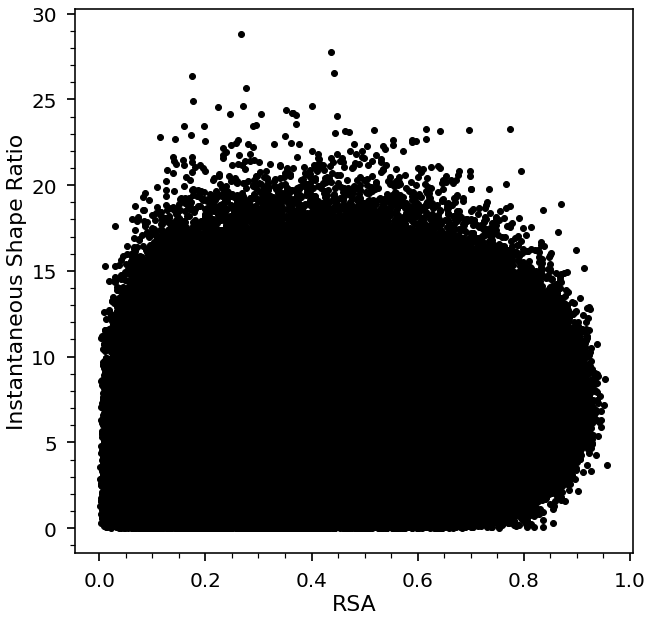

In [56]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(GW_moments_ind_runs_100_.RSA.values,GW_moments_ind_runs_100_.ratio.values,color='black')

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.set_xlabel('RSA',fontsize=22)    
ax.set_ylabel('Instantaneous Shape Ratio',fontsize=22)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    



# doodling end

In [42]:
#its actually fC but i kept the function name as fA 
def fA_using_cdist(protein_var,protein_name,poly_id,GW_var,upto_ind_run,every_ith_snap,GW_every_ith_snap,radius_):
    x_total=[]
    y_total=[]
    if poly_id=='protein':
        protein_label='protein_'+protein_name
        temp_protein=protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['Rg/Rg_mean']=x_total        
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total, temp_protein
    elif poly_id=='polymer':
        print('for RW or SAW include epas in input')
        testeq_pol = protein_var.copy()        
        protein_label='polymer_'+protein_name
        j=0
        for chain_length in testeq_pol.chain_length.unique():
            x=testeq_pol[(testeq_pol.chain_length==chain_length) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) ].Rg2**0.5).mean())
            y=testeq_pol[(testeq_pol.chain_length==chain_length)  ].ratio
            x_total.append(x)
            y_total.append(y)

            j+=1                
        del  testeq_pol, j
        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['Rg/Rg_mean']=x_total
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
        
    elif poly_id=='pei':
        print('for PEI include proton state in input')
        protein_label='pei_'+protein_name
#         x=testeq_pol['Rg/Rg_mean']
#         y=testeq_pol.ratio
#         x_total.append(x)
#         y_total.append(y)
#         x_total=list(chain.from_iterable(x_total))
#         y_total=list(chain.from_iterable(y_total))        
        poly_var=protein_var.copy()
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
    else:
        return print('ERROR')
    GW_po=GW_var[GW_var.run_number<=upto_ind_run][['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    upto_snapshots=250000
    GW_mean_Rg_Rg_mean=np.mean(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_ratio=np.mean(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
    GW_std_ratio=np.std(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
        
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values
    
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    GW_not_in_range=[]
    j=0
    for point in GW_points:

        if not tree_protein.query_ball_point(point,radius_):
            GW_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'{j} GW snapshots completed')
            
    fA_by_distance=(GW_points.shape[0]-len(GW_not_in_range))/(GW_points.shape[0])
    return fA_by_distance    


In [43]:
def RSA_based_fC(protein_var,protein_name,poly_id,p_moments_var,
                       GW_moment_var,upto_ind_run,every_ith_snap,GW_every_ith_snap,radius_):
    print('moments_df and ratio_df must match in order of rows for protein/pei')
    x_total=[]
    y_total=[]
    if poly_id=='protein':
        protein_label='protein_'+protein_name
        temp_protein=protein_var.copy()
        temp_protein['RSA']=p_moments_var.RSA.values
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].RSA.values)                    

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['RSA']=p_moments_var.RSA.values
        poly_var['Rg/Rg_mean']=x_total        
        protein_pro=poly_var[['Rg/Rg_mean','RSA']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total, temp_protein
        
    elif poly_id=='pei':
        print('for PEI include proton state in input')
        protein_label='pei_'+protein_name
#         x=testeq_pol['Rg/Rg_mean']
#         y=testeq_pol.RSA
#         x_total.append(x)
#         y_total.append(y)
#         x_total=list(chain.from_iterable(x_total))
#         y_total=list(chain.from_iterable(y_total))        
        poly_var=protein_var.copy()
        poly_var['RSA']=p_moments_var.RSA.values
        protein_pro=poly_var[['Rg/Rg_mean','RSA']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
    else:
        return print('ERROR')
    GW_po=GW_moment_var[GW_moment_var.run_number<=upto_ind_run][['Rg/Rg_mean','RSA']][::GW_every_ith_snap].copy()
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    upto_snapshots=250000
    GW_mean_Rg_Rg_mean=np.mean(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_RSA=np.mean(GW_moments_ind_runs_100_['RSA'].values[0:(upto_snapshots+1)])
    GW_std_RSA=np.std(GW_moments_ind_runs_100_['RSA'].values[0:(upto_snapshots+1)])
        
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_RSA']=(combined_pro_po['RSA'].values-GW_mean_RSA)/(GW_std_RSA)
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_RSA'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_RSA'].values
    
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    GW_not_in_range=[]
    j=0
    for point in GW_points:

        if not tree_protein.query_ball_point(point,radius_):
            GW_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'{j} GW snapshots completed')
            
    fA_by_distance=(GW_points.shape[0]-len(GW_not_in_range))/(GW_points.shape[0])
    return fA_by_distance    


In [44]:
def RW_collapsed_3dplot_against_GW(epa):
    #different from the RW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_RW=RW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"

    x_total=[]
    y_total=[]
    x_polmodel_RW=[]
    y_polmodel_RW=[]
    x_polmodel_GW=[]
    y_polmodel_GW=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]
    j=0
    for chain_length in testeq_RW.chain_length.unique():
        for epas in testeq_RW[testeq_RW.chain_length==chain_length].sort_values(by='epas').epas.unique():
            if epas==epas_cutoff:
                x=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5/((testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5).mean())
                y=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].ratio
                x_polmodel_RW.append(x)
                y_polmodel_RW.append(y)

                j+=1      

    #SETTING DIFFERENT EPAS CUTOFF CAREFUL            
    epas_cutoff=epa        

    j=0
    for chain_length in testeq_RW.chain_length.unique():
        for epas in testeq_RW[testeq_RW.chain_length==chain_length].sort_values(by='epas').epas.unique():
            if epas==epas_cutoff:
                x=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5/((testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5).mean())
                y=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].ratio
                x_total.append(x)
                y_total.append(y)

                j+=1


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_RW=list(chain.from_iterable(x_polmodel_RW))
    y_polmodel_RW=list(chain.from_iterable(y_polmodel_RW))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_RW, epas_cutoff, j

    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)


    # Set up default x and y limits
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')

    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter
    
    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')

    
    axTemperature.scatter(x_polmodel_RW,y_polmodel_RW, marker=scatter_markers[3],s=40,alpha=0.6,color='blue',
                           label='RW: Uncollapsed '+r'($\epsilon_{ps}$= 0)')
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='indigo',
                                      label='RW: Collapsed '+r'($\epsilon_{ps}$'+f'= {epa})')   
    


    # plt.setp(axTemperature.get_yticklabels(), fontsize=12)
    # plt.setp(axTemperature.get_xticklabels(), fontsize=12)
    # axTemperature.legend(fontsize=12)


    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)




    axHistx.hist(x_polmodel_RW, bins=xbins, color = 'blue',
                label='RW: Uncollapsed',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'indigo',
                label='RW: Collapsed',alpha=0.5,density=True)
    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW',alpha=0.5,density=True)

    axHisty.hist(y_polmodel_RW, bins=ybins, color = 'blue',orientation='horizontal',
                label='RW: Uncollapsed',alpha=0.5,density=True)
    axHisty.hist(y_total, bins=ybins, color = 'indigo',orientation='horizontal',
                label='RW: Collapsed',alpha=0.5,density=True)
    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW',alpha=0.5,density=True)
    
    

    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
#     step_x=0.02
#     step_y=0.2
#     max_value_x=max(x_polmodel_GW)+raise_max_xlim
#     n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

#     max_value_y=max(y_polmodel_GW)+raise_max_ylim
#     n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
#     gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


#     gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])
    global fC_value
    fC_value=fA_using_cdist(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==epa],
                   'RW',
                   'polymer',GW_ind_runs_chainlen100,
                   24,RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==epa].shape[0],
                   1,0.1)

    axTemperature.text(0.7,0.65,
                       '$f_C$= '+format(fC_value,'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    del testeq_GW


    axTemp_legend=axTemperature.legend(loc='upper right',fontsize=13)

    frame = axTemp_legend.get_frame()

    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig('figures/GW_collapsed_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [45]:
def SAW_collapsed_3dplot_against_GW(epa):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_SAW=SAW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"

    x_total=[]
    y_total=[]
    x_polmodel_SAW=[]
    y_polmodel_SAW=[]
    x_polmodel_GW=[]
    y_polmodel_GW=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]
    j=0
    for chain_length in testeq_SAW.chain_length.unique():
        for epas in testeq_SAW[testeq_SAW.chain_length==chain_length].sort_values(by='epas').epas.unique():
            if epas==epas_cutoff:
                x=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5/((testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5).mean())
                y=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].ratio
                x_polmodel_SAW.append(x)
                y_polmodel_SAW.append(y)

                j+=1      

    #SETTING DIFFERENT EPAS CUTOFF CAREFUL            
    epas_cutoff=epa        

    j=0
    for chain_length in testeq_SAW.chain_length.unique():
        for epas in testeq_SAW[testeq_SAW.chain_length==chain_length].sort_values(by='epas').epas.unique():
            if epas==epas_cutoff:
                x=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5/((testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5).mean())
                y=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].ratio
                x_total.append(x)
                y_total.append(y)

                j+=1


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_SAW=list(chain.from_iterable(x_polmodel_SAW))
    y_polmodel_SAW=list(chain.from_iterable(y_polmodel_SAW))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_SAW, epas_cutoff, j

    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)


    # Set up default x and y limits
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')

    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter
    
    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')

    
    axTemperature.scatter(x_polmodel_SAW,y_polmodel_SAW, marker=scatter_markers[3],s=40,alpha=0.6,color='blue',
                           label='SAW: Uncollapsed '+r'($\epsilon_{ps}$= 0)')
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='indigo',
                                      label='SAW: Collapsed '+r'($\epsilon_{ps}$'+f'= {epa})')   
    


    # plt.setp(axTemperature.get_yticklabels(), fontsize=12)
    # plt.setp(axTemperature.get_xticklabels(), fontsize=12)
    # axTemperature.legend(fontsize=12)


    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)




    axHistx.hist(x_polmodel_SAW, bins=xbins, color = 'blue',
                label='SAW: Uncollapsed',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'indigo',
                label='SAW: Collapsed',alpha=0.5,density=True)
    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW',alpha=0.5,density=True)

    axHisty.hist(y_polmodel_SAW, bins=ybins, color = 'blue',orientation='horizontal',
                label='SAW: Uncollapsed',alpha=0.5,density=True)
    axHisty.hist(y_total, bins=ybins, color = 'indigo',orientation='horizontal',
                label='SAW: Collapsed',alpha=0.5,density=True)
    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW',alpha=0.5,density=True)
    
    

    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
#     step_x=0.02
#     step_y=0.2
#     max_value_x=max(x_polmodel_GW)+raise_max_xlim
#     n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

#     max_value_y=max(y_polmodel_GW)+raise_max_ylim
#     n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
#     gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


#     gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])
    global fC_value
    fC_value=fA_using_cdist(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==epa],
                   'SAW',
                   'polymer',GW_ind_runs_chainlen100,
                   24,SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==epa].shape[0],
                   1,0.1)

    axTemperature.text(0.7,0.65,
                       '$f_C$= '+format(fC_value,'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    


    axTemp_legend=axTemperature.legend(loc='upper right',fontsize=13)

    frame = axTemp_legend.get_frame()

    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig('figures/GW_collapsed_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [46]:
def protein_3dplot_against_GW(protein_var,protein_label,second_obj,provided_color):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"
    global fC_value


    epas_cutoff=0
    testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()

        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
            

        fC_value=fA_using_cdist(temp_protein,
                       protein_label,
                       second_obj,GW_ind_runs_chainlen100,
                       24,temp_protein.shape[0],
                       1,0.1)
            
            
        del temp_protein
    elif second_obj=='polymer':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        

        fC_value=fA_using_cdist(testeq_pol[testeq_pol.epas==epas_cutoff],
                       protein_label,
                       second_obj,GW_ind_runs_chainlen100,
                       24,testeq_pol[testeq_pol.epas==epas_cutoff].shape[0],
                       1,0.1)
        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='PEI' or second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      


        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)


        fC_value=fA_using_cdist(testeq_pol[testeq_pol.proton==proton_cutoff],
                       protein_label,
                       second_obj,GW_ind_runs_chainlen100,
                       24,testeq_pol[testeq_pol.proton==proton_cutoff].shape[0],
                       1,0.1)
        
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell


    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)


    # Set up default x and y limits
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')
    elif max(x_total)>max_x_val or min(x_total)<0:
        return print('ERROR')        
    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')
    elif max(y_total)>max_y_val or min(y_total)<0:
        return print('ERROR')        

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
#     step_x=0.02
#     step_y=0.2
#     max_value_x=max(x_polmodel_GW)+raise_max_xlim
#     n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

#     max_value_y=max(y_polmodel_GW)+raise_max_ylim
#     n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
#     gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


#     gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

#   fC value calculation is upwards, double check carefully

    axTemperature.text(0.7,0.65,
                       '$f_C$= '+format(fC_value,'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)

#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
#    global fa_protein_pol
#    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
#    fa_protein_pol=float(fa_protein_pol)
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,loc='upper right')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = provided_color)






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [47]:
def scatter_plot_2d_RSA_based(protein_var,protein_label,second_obj,p_moments_var,provided_color):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="RSA"
    global fC_value_rsa


    epas_cutoff=0
    testeq_GW=GW_moments_ind_runs_100_[GW_moments_ind_runs_100_.run_number<=24].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['RSA'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        temp_protein['RSA']=p_moments_var.RSA.values
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].RSA.values)                    
            

        fC_value_rsa=RSA_based_fC(temp_protein,protein_label,second_obj,p_moments_var,
                       GW_moments_ind_runs_100_,24,temp_protein.shape[0],1,0.1)
            
            
        del temp_protein
    elif second_obj=='PEI' or second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      


        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].RSA
        x_total.append(x)
        y_total.append(y)



        fC_value_rsa=RSA_based_fC(testeq_pol[testeq_pol.proton==proton_cutoff],protein_label,second_obj,
                     p_moments_var[p_moments_var.proton==proton_cutoff],
                       GW_moments_ind_runs_100_,24,temp_protein.shape[0],1,0.1)
        
        del proton_cutoff, testeq_pol
        
    else:
        return print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell


    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)


    # Set up default x and y limits
    max_x_val=3
    max_y_val=1.1
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')
    elif max(x_total)>max_x_val or min(x_total)<0:
        return print('ERROR')        
    elif testeq_GW['RSA'].max()>max_y_val or testeq_GW['RSA'].min()<0:
        return print('ERROR')
    elif max(y_total)>max_y_val or min(y_total)<0:
        return print('ERROR')        

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
#     step_x=0.02
#     step_y=0.2
#     max_value_x=max(x_polmodel_GW)+raise_max_xlim
#     n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

#     max_value_y=max(y_polmodel_GW)+raise_max_ylim
#     n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
#     gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


#     gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

#   fC value calculation is upwards, double check carefully

    axTemperature.text(0.5,0.93,
                       '$f_C$= '+format(fC_value_rsa,'0.5f'),
                      transform=axTemperature.transAxes,fontsize=18)

#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
#    global fa_protein_pol
#    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
#    fa_protein_pol=float(fa_protein_pol)
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,loc='upper left')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = provided_color)






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


# get data/figures for manuscript

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


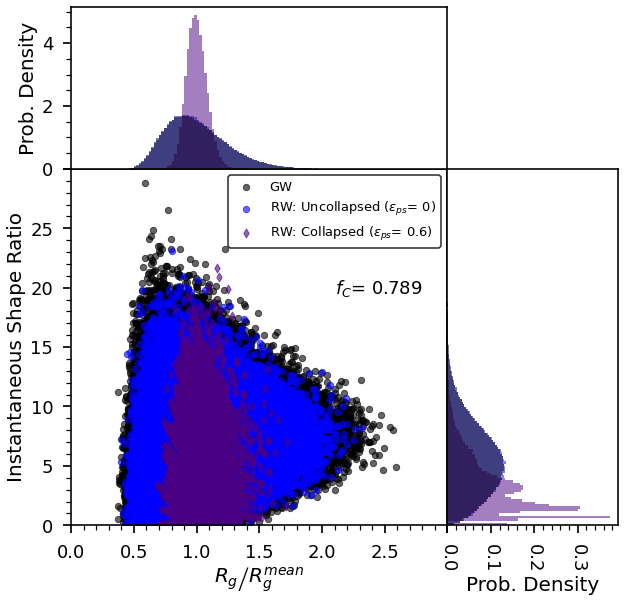

In [66]:
RW_collapsed_3dplot_against_GW(0.6)
plt.savefig('figures/RW_collapsed_3dplot_against_GW.png', dpi = 1000, bbox_inches='tight')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


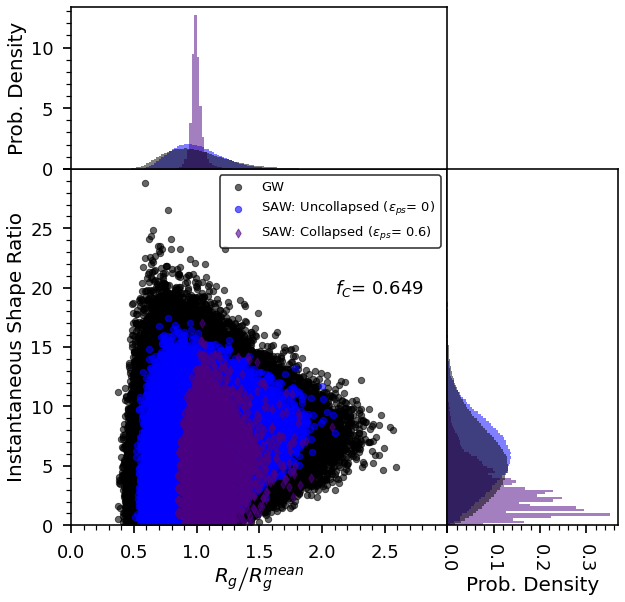

In [70]:
SAW_collapsed_3dplot_against_GW(0.6)
plt.savefig('figures/SAW_collapsed_3dplot_against_GW.png', dpi = 1000, bbox_inches='tight')

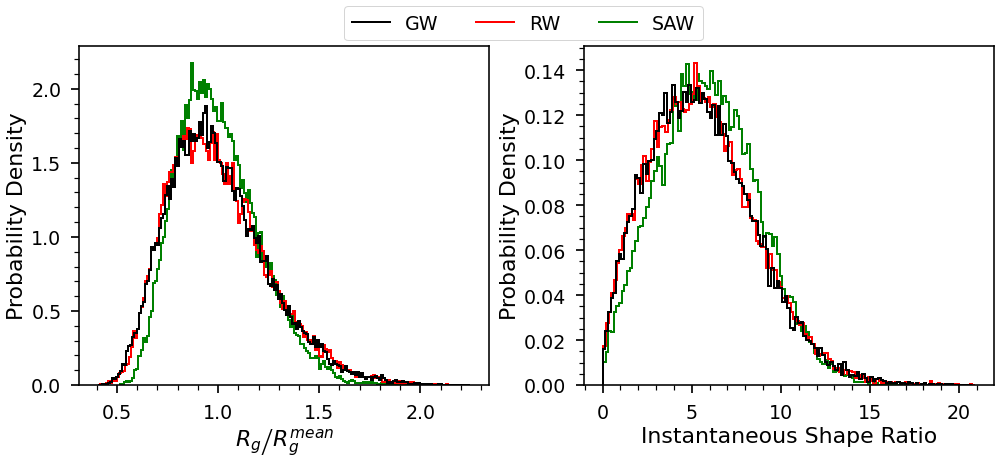

In [73]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
#chain_length=50
every_jth_frame=1
SAW_testeq=SAW_equil_chain_rg_ree.copy()[::every_jth_frame]
RW_testeq=RW_equil_chain_rg_ree.copy()[::every_jth_frame]
GW_testeq=GW_equil_chain_rg_ree.copy()[::every_jth_frame]
color_SAW='green'
color_RW='red'
color_GW='black'
epas=0



chain_length=150
ax[0].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean()),
        label='SAW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_SAW,
       bins=np.arange((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                     (SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
       linewidth=2)
ax[0].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean()),
        label='RW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_RW,
       bins=np.arange((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                     (RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
       linewidth=2)
ax[0].hist(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values,
        label='GW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_GW,
       bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.min(),
                     GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.max(),0.01),
       linewidth=2)

    

ax[1].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio,
        label='SAW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_SAW,
       bins=np.arange(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.min(),
                     SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.max(),0.15),
       linewidth=2)
ax[1].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio,
        label='RW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_RW,
       bins=np.arange(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.min(),
                     RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.max(),0.15),
       linewidth=2)
ax[1].hist(GW_testeq[(GW_testeq.chain_length==chain_length) ].ratio,
        label='GW, '+f'N = {chain_length}',
        histtype='step',linestyle=('solid'),density=True,color=color_GW,
       bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.min(),
                     GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.max(),0.15),
       linewidth=2)        
    
        

line_GW=Line2D([0], [0], label=f'GW', color=color_GW,linewidth=2)
line_RW=Line2D([0], [0], label=f'RW', color=color_RW,linewidth=2)
line_SAW=Line2D([0], [0], label=f'SAW', color=color_SAW,linewidth=2)
handles=[line_GW,line_RW,line_SAW]

ax[0].set_ylabel('Probability Density',fontsize=22)

label=r'$R_g\left/R_g^{mean}\right.$'
ax[0].set_xlabel(label,fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

ax[1].set_ylabel('Probability Density',fontsize=22)


ax[1].set_xlabel('Instantaneous Shape Ratio',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

fig.legend(handles=handles,fontsize=19,ncol=3,bbox_to_anchor=(0.71,1.09))

plt.tight_layout()
plt.savefig('figures/Rg_Rg_mean_distribution_ratio_single_chain_length_GW_RW_SAW.png',
            dpi = 1000, bbox_inches='tight')
del SAW_testeq, RW_testeq, GW_testeq


error propagation included for 2nd definition
doesnt have chain length 25


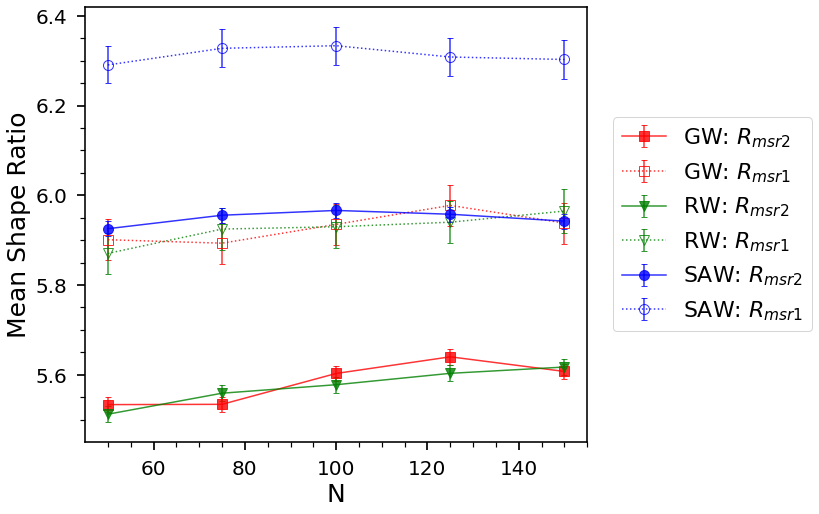

In [64]:
#pay attention to first and second definitions
#come_here
#have to tell Jesse about error propagation here
#error propagation formula https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html
skip_chain_length=25
print('error propagation included for 2nd definition')
print(f'doesnt have chain length {skip_chain_length}')
epas=0
fig,ax=plt.subplots(figsize=(9,8))
x_axis=[]
GW_ratio_1stdef=[]  #'<Ree^2/Rg^2>'
GW_ratio_1sterr=[]  #'<Ree^2/Rg^2>'
GW_ratio_2nddef=[]  #'<Ree^2>/<Rg^2>'
GW_ratio_2nderr=[]  #'<Ree^2>/<Rg^2>'
RW_ratio_1stdef=[]  #'<Ree^2/Rg^2>'
RW_ratio_1sterr=[]  #'<Ree^2/Rg^2>'
RW_ratio_2nddef=[]  #'<Ree^2>/<Rg^2>'
RW_ratio_2nderr=[]  #'<Ree^2>/<Rg^2>'
SAW_ratio_1stdef=[]  #'<Ree^2/Rg^2>'
SAW_ratio_1sterr=[]  #'<Ree^2/Rg^2>'
SAW_ratio_2nddef=[]  #'<Ree^2>/<Rg^2>'
SAW_ratio_2nderr=[]  #'<Ree^2>/<Rg^2>'

for i in SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==epas].chain_length.unique():#chain length same for GW and SAW and RW
    if i!=skip_chain_length:
        x_axis.append(i)
        GW_ratio_1stdef.append(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].ratio.mean())
        GW_ratio_1sterr.append(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].ratio.sem())    
        GW_ratio_2nddef.append(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rend2.mean()/GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rg2.mean())
        #error propagation for 2nddef
        GW_del_x_by_x=GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rend2.sem()/GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rend2.mean()
        GW_del_y_by_y=GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rg2.sem()/GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rg2.mean()
        GW_ratio_2nderr.append((GW_del_x_by_x+GW_del_y_by_y)*(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rend2.mean()/GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rg2.mean()))
        RW_ratio_1stdef.append(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].ratio.mean())
        RW_ratio_1sterr.append(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].ratio.sem())    
        RW_ratio_2nddef.append(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rend2.mean()/RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rg2.mean())
        #error propagation for 2nddef
        RW_del_x_by_x=RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rend2.sem()/RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rend2.mean()
        RW_del_y_by_y=RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rg2.sem()/RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rg2.mean()
        RW_ratio_2nderr.append((RW_del_x_by_x+RW_del_y_by_y)*(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rend2.mean()/RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas)].Rg2.mean()))        
        SAW_ratio_1stdef.append(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].ratio.mean())
        SAW_ratio_1sterr.append(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].ratio.sem())    
        SAW_ratio_2nddef.append(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rend2.mean()/SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rg2.mean())
        #error propagation for 2nddef
        SAW_del_x_by_x=SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rend2.sem()/SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rend2.mean()
        SAW_del_y_by_y=SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rg2.sem()/SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rg2.mean()        
        SAW_ratio_2nderr.append((SAW_del_x_by_x+SAW_del_y_by_y)*(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rend2.mean()/SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas)].Rg2.mean()))
        
# ax.plot(x_axis,GW_ratio_1stdef,color='red',alpha=0.8)        
# ax.plot(x_axis,GW_ratio_2nddef,color='orange',alpha=0.8)
# ax.plot(x_axis,SAW_ratio_1stdef,color='blue',
#          alpha=0.8)        
# ax.plot(x_axis,SAW_ratio_2nddef,color='green',
#          alpha=0.8)


#plt.scatter(x_axis,GW_ratio_1stdef,label='<Ree^2/Rg^2>',color='red',alpha=0.8) 
#plt.scatter(x_axis,GW_ratio_2nddef,label='<Ree^2>/<Rg^2>',color='green',alpha=0.8)
ax.errorbar(x_axis,GW_ratio_1stdef,color='red',
            alpha=0.8,yerr=GW_ratio_1sterr,capsize=3,
            label=r'GW: $R_{msr2}$',marker='s',ms=10) #mfc is markerfacecolor
ax.errorbar(x_axis,GW_ratio_2nddef,color='red',alpha=0.8,               #setting mfc=none for 2nd def in EVERY chain
            yerr=GW_ratio_2nderr,capsize=3,linestyle='dotted',
            label=r'GW: $R_{msr1}$',marker='s',ms=10,mfc='None')
ax.errorbar(x_axis,RW_ratio_1stdef,color='green',
            alpha=0.8,yerr=RW_ratio_1sterr,capsize=3,
            label=r'RW: $R_{msr2}$',marker='v',ms=10) 
ax.errorbar(x_axis,RW_ratio_2nddef,color='green',alpha=0.8,linestyle='dotted',
            yerr=RW_ratio_2nderr,capsize=3,
            label=r'RW: $R_{msr1}$',marker='v',ms=10,mfc='None')
ax.errorbar(x_axis,SAW_ratio_1stdef,color='blue',
            alpha=0.8,yerr=SAW_ratio_1sterr,
            label=r'SAW: $R_{msr2}$',capsize=3,marker='o',ms=10) 
ax.errorbar(x_axis,SAW_ratio_2nddef,linestyle='dotted',
            color='blue',alpha=0.8,
            yerr=SAW_ratio_2nderr,
            label=r'SAW: $R_{msr1}$',capsize=3,marker='o',ms=10,mfc='None')


plt.setp(ax.get_xticklabels(),fontsize=22)
plt.setp(ax.get_yticklabels(),fontsize=22)
ax.set_xlabel('N',fontsize=25)
ax.set_ylabel('Mean Shape Ratio',fontsize=25)
ax.legend(fontsize=22,loc='center right',bbox_to_anchor = (1.47, 0.5))
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    
plt.savefig('figures/gw_rw_saw_mean_ratio_bothdef.png',dpi=1000,bbox_inches='tight')

#plt.text(10000,6.1,'Chain Length= 100',fontsize=14)
#PAY ATTENTION TO BELOW DETAILS!!
#     print('interval= ',i,'Ratio mean <Ree^2/Rg^2>',
#           GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].ratio.mean(),
#           GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].ratio.std())
#     print('interval= ',i,'<Ree^2>/<Rg^2>',
#           GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rend2.mean()/GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].Rg2.mean(),
#           GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].ratio.std()) 
    

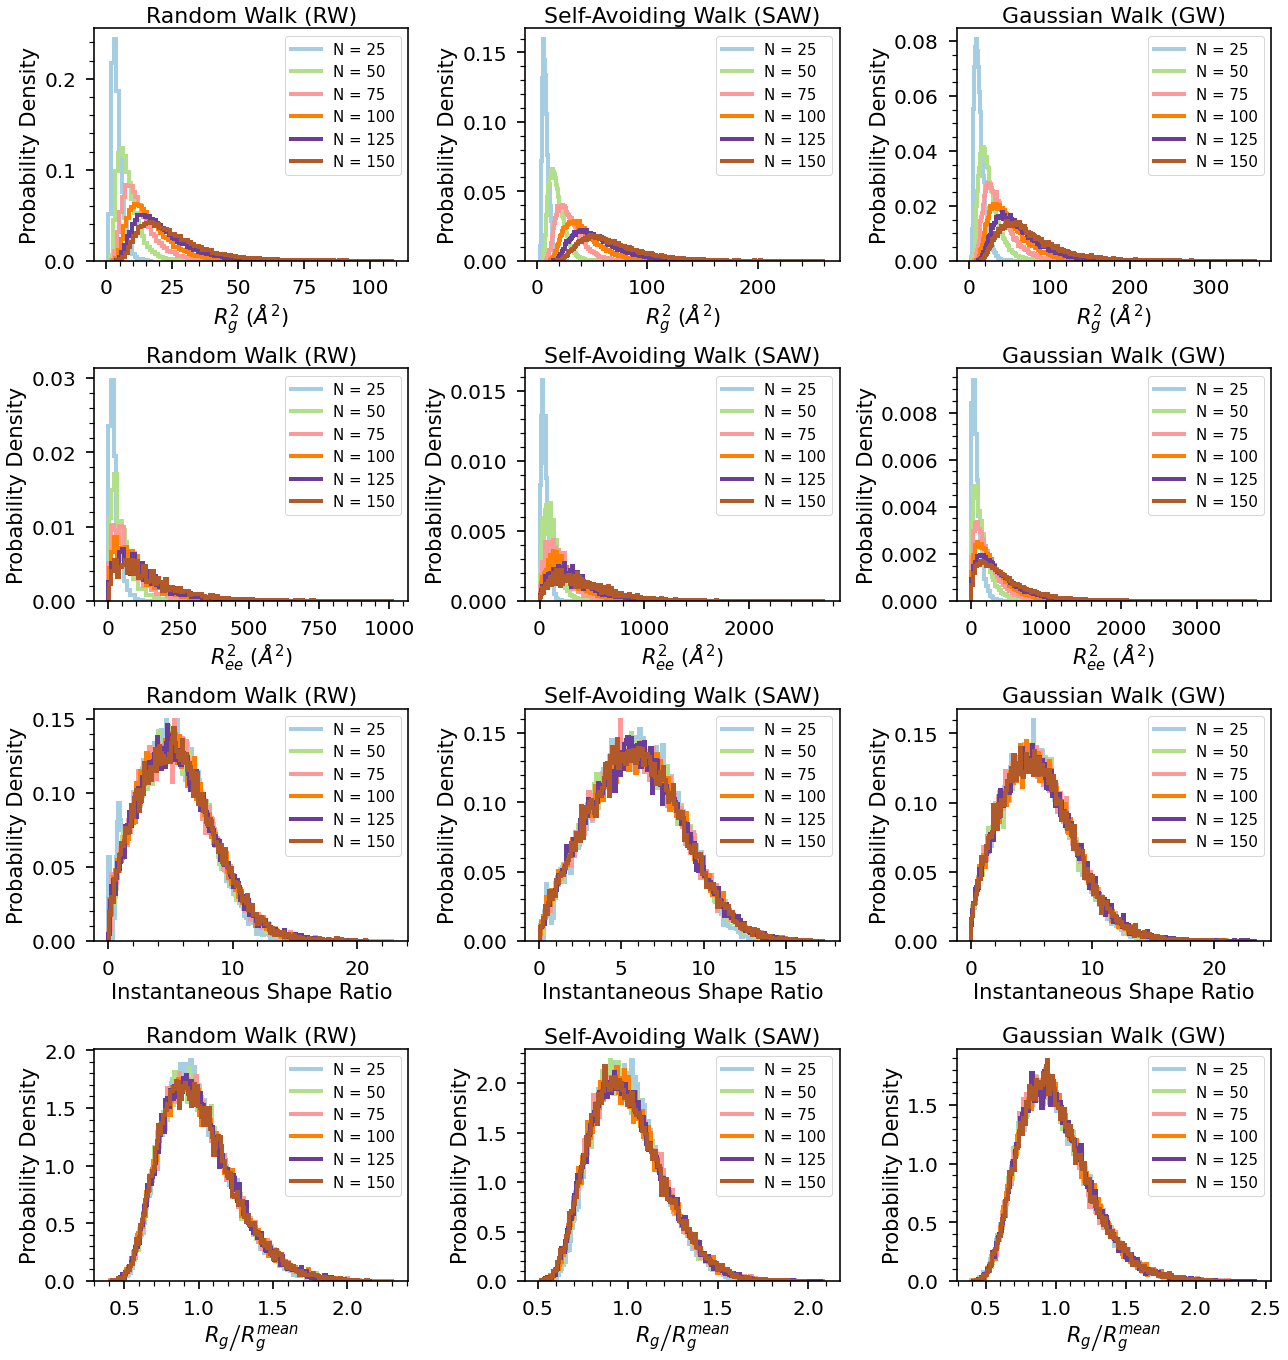

In [67]:
#print('be careful with any type of select and replace')
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(18,19))
#plt.subplots_adjust(hspace=0.5)
#chain_length=50
every_jth_frame=1
SAW_testeq=SAW_equil_chain_rg_ree.copy()[::every_jth_frame]
SAW_testeq['chainid']=np.repeat('Self-Avoiding Walk (SAW)',SAW_testeq.shape[0])
SAW_Rg2_handles=[]
SAW_Ree2_handles=[]
SAW_ratio_handles=[]
SAW_Rg_Rg_mean_handles=[]
RW_testeq=RW_equil_chain_rg_ree.copy()[::every_jth_frame]
RW_testeq['chainid']=np.repeat('Random Walk (RW)',RW_testeq.shape[0])
RW_Rg2_handles=[]
RW_Ree2_handles=[]
RW_ratio_handles=[]
RW_Rg_Rg_mean_handles=[]
GW_testeq=GW_equil_chain_rg_ree.copy()[::every_jth_frame]
GW_testeq['chainid']=np.repeat('Gaussian Walk (GW)',GW_testeq.shape[0])
GW_Rg2_handles=[]
GW_Ree2_handles=[]
GW_ratio_handles=[]
GW_Rg_Rg_mean_handles=[]
epas=0

ax=axs.ravel()



#RW Rg2
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in RW_testeq.chain_length.unique():
    chosen_color=next(color)
    ax[0].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
                bins=np.arange(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2.min(),
                RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2.max(),1),
                linewidth=4)
    RW_Rg2_handles.append(Line2D([0], [0], label='N = '+str(chain_length),color=chosen_color,linewidth=4))             
             
ax[0].set_title(RW_testeq.chainid.unique()[0],fontsize=22)    
ax[0].legend(handles=RW_Rg2_handles,fontsize=15)
ax[0].set_ylabel('Probability Density',fontsize=21)
ax[0].set_xlabel(r'$R_{g}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)
plt.setp(ax[0].get_xticklabels(),fontsize=15)
plt.setp(ax[0].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)

ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#SAW Rg2
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in SAW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[1].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2.min(),
                         SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2.max(),1),
           linewidth=4)
    SAW_Rg2_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))
    
             
ax[1].set_title(SAW_testeq.chainid.unique()[0],fontsize=22)    
ax[1].legend(handles=SAW_Rg2_handles,fontsize=15)
ax[1].set_ylabel('Probability Density',fontsize=21)


ax[1].set_xlabel(r'$R_{g}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)

plt.setp(ax[1].get_xticklabels(),fontsize=15)
plt.setp(ax[1].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)

ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#GW Rg2  
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in GW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[2].hist(GW_testeq[(GW_testeq.chain_length==chain_length) ].Rg2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)].Rg2.min(),
                         GW_testeq[(GW_testeq.chain_length==chain_length)].Rg2.max(),1),
           linewidth=4) 
    GW_Rg2_handles.append(Line2D([0], [0],
                                 label='N = '+str(chain_length),color=chosen_color,linewidth=4))
             
ax[2].set_title(GW_testeq.chainid.unique()[0],fontsize=22)    
ax[2].legend(handles=GW_Rg2_handles,fontsize=15)
ax[2].set_ylabel('Probability Density',fontsize=21)


ax[2].set_xlabel(r'$R_{g}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)

plt.setp(ax[2].get_xticklabels(),fontsize=15)
plt.setp(ax[2].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[2].spines[i].set_linewidth(1.6)

ax[2].minorticks_on()
ax[2].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[2].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

             
#RW Ree2 
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in RW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[3].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rend2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rend2.min(),
                         RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rend2.max(),9.5),
           linewidth=4)
    RW_Ree2_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))
             
ax[3].set_title(RW_testeq.chainid.unique()[0],fontsize=22)    
ax[3].legend(handles=RW_Ree2_handles,fontsize=15)
ax[3].set_ylabel('Probability Density',fontsize=21)


ax[3].set_xlabel(r'$R_{ee}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)

plt.setp(ax[3].get_xticklabels(),fontsize=15)
plt.setp(ax[3].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[3].spines[i].set_linewidth(1.6)

ax[3].minorticks_on()
ax[3].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[3].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
             
#SAW Ree2   
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in SAW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[4].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rend2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rend2.min(),
                         SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rend2.max(),9.5),
           linewidth=4)
    SAW_Ree2_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))

ax[4].set_title(SAW_testeq.chainid.unique()[0],fontsize=22)    
ax[4].legend(handles=SAW_Ree2_handles,fontsize=15)
ax[4].set_ylabel('Probability Density',fontsize=21)


ax[4].set_xlabel(r'$R_{ee}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)

plt.setp(ax[4].get_xticklabels(),fontsize=15)
plt.setp(ax[4].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[4].spines[i].set_linewidth(1.6)

ax[4].minorticks_on()
ax[4].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[4].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#GW Ree2 
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in GW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[5].hist(GW_testeq[(GW_testeq.chain_length==chain_length) ].Rend2,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)].Rend2.min(),
                         GW_testeq[(GW_testeq.chain_length==chain_length)].Rend2.max(),25),
           linewidth=4)
    GW_Ree2_handles.append(Line2D([0], [0], label='N = '+str(chain_length),color=chosen_color,linewidth=4))
             
ax[5].set_title(GW_testeq.chainid.unique()[0],fontsize=22)    
ax[5].legend(handles=GW_Ree2_handles,fontsize=15)
ax[5].set_ylabel('Probability Density',fontsize=21)


ax[5].set_xlabel(r'$R_{ee}^2$'+' ('+ r'$\AA^2$'+')',fontsize=21)

plt.setp(ax[5].get_xticklabels(),fontsize=15)
plt.setp(ax[5].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[5].spines[i].set_linewidth(1.6)

ax[5].minorticks_on()
ax[5].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[5].tick_params(axis='both', which='minor', width = 1.2, size = 5)    


#RW ratio 
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in RW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[6].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.min(),
                         RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.max(),0.1),
           linewidth=4)
    RW_ratio_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))
             
ax[6].set_title(RW_testeq.chainid.unique()[0],fontsize=22)    
ax[6].legend(handles=RW_ratio_handles,fontsize=15)
ax[6].set_ylabel('Probability Density',fontsize=21)


ax[6].set_xlabel('Instantaneous Shape Ratio',fontsize=21)

plt.setp(ax[6].get_xticklabels(),fontsize=15)
plt.setp(ax[6].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[6].spines[i].set_linewidth(1.6)

ax[6].minorticks_on()
ax[6].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[6].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
             
#SAW ratio  
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in SAW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[7].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.min(),
                         SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.max(),0.1),
           linewidth=4)
    SAW_ratio_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))

ax[7].set_title(SAW_testeq.chainid.unique()[0],fontsize=22)    
ax[7].legend(handles=SAW_ratio_handles,fontsize=15)
ax[7].set_ylabel('Probability Density',fontsize=21)


ax[7].set_xlabel('Instantaneous Shape Ratio',fontsize=21)

plt.setp(ax[7].get_xticklabels(),fontsize=15)
plt.setp(ax[7].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[7].spines[i].set_linewidth(1.6)

ax[7].minorticks_on()
ax[7].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[7].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#GW ratio 
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in GW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[8].hist(GW_testeq[(GW_testeq.chain_length==chain_length) ].ratio,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.min(),
                         GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.max(),0.1),
           linewidth=4)
    GW_ratio_handles.append(Line2D([0], [0], label='N = '+str(chain_length),color=chosen_color,linewidth=4))
             
ax[8].set_title(GW_testeq.chainid.unique()[0],fontsize=22)    
ax[8].legend(handles=GW_ratio_handles,fontsize=15)
ax[8].set_ylabel('Probability Density',fontsize=21)


ax[8].set_xlabel('Instantaneous Shape Ratio',fontsize=21)

plt.setp(ax[8].get_xticklabels(),fontsize=15)
plt.setp(ax[8].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[8].spines[i].set_linewidth(1.6)

ax[8].minorticks_on()
ax[8].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[8].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#RW Rg/Rg_mean 
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in RW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[9].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean()),
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
          bins=np.arange((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                     (RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
           linewidth=4)
    RW_Rg_Rg_mean_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))
             
ax[9].set_title(RW_testeq.chainid.unique()[0],fontsize=22)    
ax[9].legend(handles=RW_Rg_Rg_mean_handles,fontsize=15)
ax[9].set_ylabel('Probability Density',fontsize=21)


ax[9].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=21)

plt.setp(ax[9].get_xticklabels(),fontsize=15)
plt.setp(ax[9].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[9].spines[i].set_linewidth(1.6)

ax[9].minorticks_on()
ax[9].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[9].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
             
#SAW Rg/Rg_mean   
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in SAW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[10].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean()),
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                     (SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
           linewidth=4)
    SAW_Rg_Rg_mean_handles.append(Line2D([0], [0], label='N = '+str(chain_length),
                                 color=chosen_color,linewidth=4))

ax[10].set_title(SAW_testeq.chainid.unique()[0],fontsize=22)    
ax[10].legend(handles=SAW_Rg_Rg_mean_handles,fontsize=15)
ax[10].set_ylabel('Probability Density',fontsize=21)


ax[10].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=21)

plt.setp(ax[10].get_xticklabels(),fontsize=15)
plt.setp(ax[10].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[10].spines[i].set_linewidth(1.6)

ax[10].minorticks_on()
ax[10].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[10].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

#GW Rg/Rg_mean  
color = iter(cm.Paired(np.linspace(0, 1, GW_testeq.chain_length.unique().shape[0])))
for chain_length in GW_testeq.chain_length.unique():
    chosen_color=next(color)    
    ax[11].hist(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values,
            histtype='step',linestyle=('solid'),density=True, color=chosen_color,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.min(),
                     GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.max(),0.01),
           linewidth=4)
    GW_Rg_Rg_mean_handles.append(Line2D([0], [0], label='N = '+str(chain_length),color=chosen_color,linewidth=4))
             
ax[11].set_title(GW_testeq.chainid.unique()[0],fontsize=22)    
ax[11].legend(handles=GW_Rg_Rg_mean_handles,fontsize=15)
ax[11].set_ylabel('Probability Density',fontsize=21)


ax[11].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=21)

plt.setp(ax[11].get_xticklabels(),fontsize=15)
plt.setp(ax[11].get_yticklabels(),fontsize=15)

for i in ['top', 'left', 'right', 'bottom']:
    ax[11].spines[i].set_linewidth(1.6)

ax[11].minorticks_on()
ax[11].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[11].tick_params(axis='both', which='minor', width = 1.2, size = 5)    



plt.tight_layout()    
del RW_testeq,SAW_testeq,GW_testeq, RW_Rg2_handles,SAW_Rg2_handles,GW_Rg2_handles,RW_Ree2_handles,SAW_Ree2_handles,
GW_Ree2_handles, RW_Rg_Rg_mean_handles, SAW_Rg_Rg_mean_handles, GW_Rg_Rg_mean_handles

plt.tight_layout()    

plt.savefig('figures/Rg2_Ree2_distribution_RW_SAW_GW.png', dpi = 1000, bbox_inches='tight')


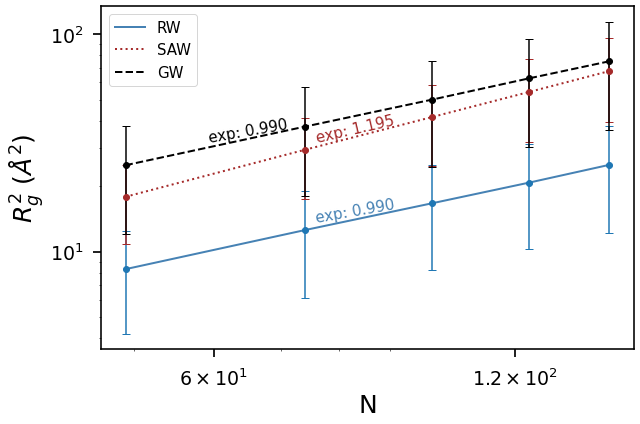

In [69]:
#use i because there are i bonds
fig,ax = plt.subplots(figsize=(9,6))
chain_length_skip=25
every_ith_frame=1
epas_value=0
x=np.array([i-1 for i in RW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
y=np.array([(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas_value)].iloc[::every_ith_frame,:].Rg2.values.mean()) for i in RW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
yerr=np.array([(RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.chain_length==i) & (RW_equil_chain_rg_ree.epas==epas_value)].iloc[::every_ith_frame,:].Rg2.values.std()) for i in RW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
a,b = np.polyfit(np.log(x), np.log(y), 1)
ax.errorbar(x,y,yerr=yerr,capsize=4,fmt='o')

ax.loglog(x,y,color='steelblue', linestyle='solid', linewidth=2,label='RW')
ax.text(0.4,0.37,'exp:'+' {:.3f}'.format(a),
        transform=ax.transAxes,
        fontsize=15,color='steelblue',rotation=10)



x=np.array([i-1 for i in SAW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
y=np.array([(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas_value)].iloc[::every_ith_frame,:].Rg2.values.mean()) for i in SAW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
yerr=np.array([(SAW_equil_chain_rg_ree[(SAW_equil_chain_rg_ree.chain_length==i) & (SAW_equil_chain_rg_ree.epas==epas_value)].iloc[::every_ith_frame,:].Rg2.values.std()) for i in SAW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
a,b = np.polyfit(np.log(x), np.log(y), 1)
b = np.polyfit(x, np.log(y), 1)
ax.errorbar(x,y,yerr=yerr,capsize=4,fmt='o',color='brown')

ax.loglog(x,y,color='brown', linestyle='dotted', linewidth=2,label='SAW')
ax.text(0.4,0.605,'exp:'+' {:.3f}'.format(a),
        transform=ax.transAxes,
        fontsize=15,color='brown',rotation=13)



x=np.array([i-1 for i in GW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
y=np.array([(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].iloc[::every_ith_frame,:].Rg2.values.mean()) for i in GW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
yerr=np.array([(GW_equil_chain_rg_ree[(GW_equil_chain_rg_ree.chain_length==i) ].iloc[::every_ith_frame,:].Rg2.values.std()) for i in GW_equil_chain_rg_ree.chain_length.unique() if i!=chain_length_skip])
a,b = np.polyfit(np.log(x), np.log(y), 1)
b = np.polyfit(x, np.log(y), 1)
ax.errorbar(x,y,yerr=yerr,capsize=4,fmt='o',color='black')
#ax.plot(x, a*x+b, color='black', linestyle='--', linewidth=2,label='GW')
ax.loglog(x,y,color='black', linestyle='dashed', linewidth=2,label='GW')
ax.text(0.2,0.605,'exp:'+' {:.3f}'.format(a),
        transform=ax.transAxes,
        fontsize=15,color='black',rotation=10)

ax.xaxis.set_major_locator(MaxNLocator(1))



plt.setp(ax.get_yticklabels(), fontsize=19)
plt.setp(ax.get_xticklabels(), fontsize=19)
ax.set_xlabel('N',fontsize=25)
ax.set_ylabel(r'$R_{g}^2$'+' ('+ r'$\AA^2$'+')',fontsize=25)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
#ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


ax.legend(fontsize=15)
plt.tight_layout()
plt.savefig('figures/exponents_RW_SAW_GW.png',dpi=1000,bbox_inches='tight')


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


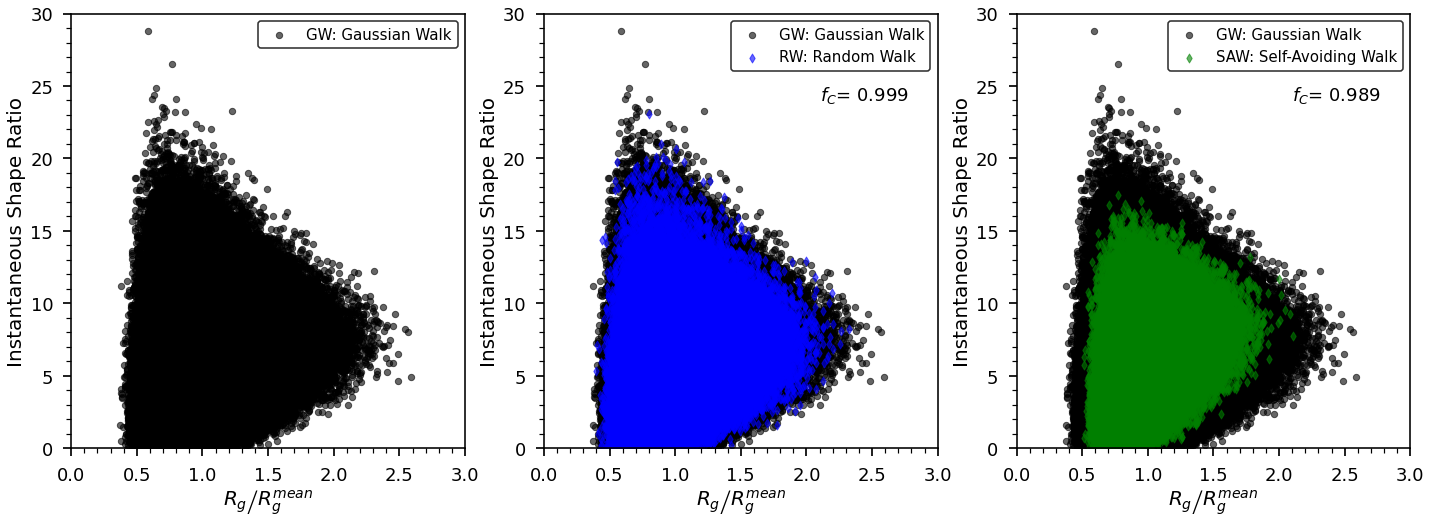

In [77]:
x_variable=r'$R_g\left/R_g^{mean}\right.$' 
y_variable="Instantaneous Shape Ratio"


testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
testeq_RW=RW_equil_chain_rg_ree.copy()
testeq_SAW=SAW_equil_chain_rg_ree.copy()


%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"

epas=0
x_total_GW=[]
y_total_GW=[]
x_total_RW=[]
y_total_RW=[]
x_total_SAW=[]
y_total_SAW=[]
x_polmodel_GW=[]
y_polmodel_GW=[]
x_polmodel_RW=[]
y_polmodel_RW=[]
x_polmodel_SAW=[]
y_polmodel_SAW=[]
 
scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
y_polmodel_GW.append(testeq_GW['ratio'].values)
x_total_GW.append(testeq_GW['Rg/Rg_mean'].values)
y_total_GW.append(testeq_GW['ratio'].values)

for chain_length in testeq_RW.chain_length.unique():
    x=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5/((testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas) ].Rg2**0.5).mean())
    y=testeq_RW[(testeq_RW.chain_length==chain_length) & (testeq_RW.epas==epas)  ].ratio
    x_total_RW.append(x)
    y_total_RW.append(y)

for chain_length in testeq_SAW.chain_length.unique():
    x=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5/((testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas) ].Rg2**0.5).mean())
    y=testeq_SAW[(testeq_SAW.chain_length==chain_length) & (testeq_SAW.epas==epas)  ].ratio
    x_total_SAW.append(x)
    y_total_SAW.append(y)


x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
x_total_GW=list(chain.from_iterable(x_total_GW))
y_total_GW=list(chain.from_iterable(y_total_GW))
x_total_RW=list(chain.from_iterable(x_total_RW))
y_total_RW=list(chain.from_iterable(y_total_RW))
x_total_SAW=list(chain.from_iterable(x_total_SAW))
y_total_SAW=list(chain.from_iterable(y_total_SAW))
    
    
#for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
# raise_max_ylim=30-max(y_polmodel_GW)
# raise_max_xlim=3-max(x_polmodel_GW)
 
# Set up default x and y limits

max_x_val=3
max_y_val=30
xlims = [0,max_x_val]
ylims = [0,max_y_val]
if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
    print('ERROR')

elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
    print('ERROR')


# Set up your x and y labels
xlabel = x_variable
ylabel = y_variable


# left, width = 0.12, 1.1
# bottom, height = 0.12, 1.5
# rect_temperature = [left, bottom, width, height] # dimensions of axtemperature plot


fig,axTemperature = plt.subplots(nrows=1,ncols=3,figsize=(24,8))

axTemperature[0].scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW: Gaussian Walk')


#Plot the axes labels
axTemperature[0].set_xlabel(xlabel,fontsize=20)
axTemperature[0].set_ylabel(ylabel,fontsize=20)

#Set up the plot limits
axTemperature[0].set_xlim(xlims)
axTemperature[0].set_ylim(ylims)

#no GW fC value calculated. its 1

#original_n_divisions=100
# step_x=0.02#(min(x_polmodel_GW)-max(x_polmodel_GW))/original_n_divisions
# step_y=0.2#(min(y_polmodel_GW)-max(y_polmodel_GW))/original_n_divisions
# max_value_x=max(x_polmodel_GW)+raise_max_xlim
# n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

# max_value_y=max(y_polmodel_GW)+raise_max_ylim
# n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
# gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


# gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

# grid_protein, _, _ = np.histogram2d(x_total_GW, y_total_GW, bins=[gridx, gridy])
# grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

#axTemperature[0].text(0.7,0.8,
#                   '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
#                  transform=axTemperature[0].transAxes,fontsize=18)


#fa_GW=float(format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'))



axTemp_legend=axTemperature[0].legend(fontsize=15)

frame = axTemp_legend.get_frame()
frame.set_linewidth(1.6)
frame.set_edgecolor('black')

for i in ['top', 'left', 'right', 'bottom']:
    axTemperature[0].spines[i].set_linewidth(1.6)


axTemperature[0].minorticks_on()
axTemperature[0].tick_params(axis='both', which='major',
                          labelsize=18, width = 1.7, size = 8,pad=10)
axTemperature[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)   
 
axTemperature[1].scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW: Gaussian Walk')
axTemperature[1].scatter(x_total_RW,y_total_RW,
                      marker=scatter_markers[0],s=40,alpha=0.6,color='blue',
                       label='RW: Random Walk')


#Plot the axes labels
axTemperature[1].set_xlabel(xlabel,fontsize=20)
axTemperature[1].set_ylabel(ylabel,fontsize=20)

#Set up the plot limits
axTemperature[1].set_xlim(xlims)
axTemperature[1].set_ylim(ylims)

#original_n_divisions=100
# step_x=0.02#(min(x_polmodel_GW)-max(x_polmodel_GW))/original_n_divisions
# step_y=0.2#(min(y_polmodel_GW)-max(y_polmodel_GW))/original_n_divisions
# max_value_x=max(x_polmodel_GW)+raise_max_xlim
# n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

# max_value_y=max(y_polmodel_GW)+raise_max_ylim
# n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
# gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


# gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

# grid_protein, _, _ = np.histogram2d(x_total_RW, y_total_RW, bins=[gridx, gridy])
# grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

fC_value=fA_using_cdist(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0],
               'RW',
               'polymer',GW_ind_runs_chainlen100,
               24,RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0].shape[0],
               1,0.1)


axTemperature[1].text(0.7,0.8,
                   '$f_C$= '+format(fC_value,'0.3f'),
                  transform=axTemperature[1].transAxes,fontsize=18)
del fC_value



axTemp_legend=axTemperature[1].legend(fontsize=15)

frame = axTemp_legend.get_frame()
frame.set_linewidth(1.6)
frame.set_edgecolor('black')

for i in ['top', 'left', 'right', 'bottom']:
    axTemperature[1].spines[i].set_linewidth(1.6)


axTemperature[1].minorticks_on()
axTemperature[1].tick_params(axis='both', which='major',
                          labelsize=18, width = 1.7, size = 8,pad=10)
axTemperature[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)   


axTemperature[2].scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW: Gaussian Walk')
axTemperature[2].scatter(x_total_SAW,y_total_SAW,
                      marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                       label='SAW: Self-Avoiding Walk')


#Plot the axes labels
axTemperature[2].set_xlabel(xlabel,fontsize=20)
axTemperature[2].set_ylabel(ylabel,fontsize=20)

#Set up the plot limits
axTemperature[2].set_xlim(xlims)
axTemperature[2].set_ylim(ylims)

#original_n_divisions=100
# step_x=0.02#(min(x_polmodel_GW)-max(x_polmodel_GW))/original_n_divisions
# step_y=0.2#(min(y_polmodel_GW)-max(y_polmodel_GW))/original_n_divisions
# max_value_x=max(x_polmodel_GW)+raise_max_xlim
# n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

# max_value_y=max(y_polmodel_GW)+raise_max_ylim
# n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
# gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


# gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

# grid_protein, _, _ = np.histogram2d(x_total_SAW, y_total_SAW, bins=[gridx, gridy])
# grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

fC_value=fA_using_cdist(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0],
               'SAW',
               'polymer',GW_ind_runs_chainlen100,
               24,SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0].shape[0],
               1,0.1)


axTemperature[2].text(0.7,0.8,
                   '$f_C$= '+format(fC_value,'0.3f'),
                  transform=axTemperature[2].transAxes,fontsize=18)




axTemp_legend=axTemperature[2].legend(fontsize=15)

frame = axTemp_legend.get_frame()
frame.set_linewidth(1.6)
frame.set_edgecolor('black')

for i in ['top', 'left', 'right', 'bottom']:
    axTemperature[2].spines[i].set_linewidth(1.6)


axTemperature[2].minorticks_on()
axTemperature[2].tick_params(axis='both', which='major',
                          labelsize=18, width = 1.7, size = 8,pad=10)
axTemperature[2].tick_params(axis='both', which='minor', width = 1.2, size = 5)   

plt.savefig('figures/GW_RW_SAW_2dplot.png', dpi = 1000, bbox_inches='tight')    
  

In [76]:
RW_equil_chain_rg_ree[(RW_equil_chain_rg_ree.epas==0) & (RW_equil_chain_rg_ree.chain_length==25)]

,epas,chain_length,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
93031,0.0,25,0.7424,0.3584,1.8016,4.0,1.0,9.0,14.0,2.9024,4.823594,-0.3376,-1.4432,0.446059
93032,0.0,25,1.4976,2.7200,0.2464,16.0,25.0,1.0,42.0,4.4640,9.408602,0.0144,2.4736,0.479894
93033,0.0,25,1.5456,1.5616,0.6784,1.0,4.0,9.0,14.0,3.7856,3.698225,0.4256,0.8832,0.231221
93034,0.0,25,0.3936,1.0304,0.9344,0.0,4.0,16.0,20.0,2.3584,8.480326,-0.5888,0.0960,0.252137
93035,0.0,25,0.6656,1.3376,1.0144,0.0,4.0,16.0,20.0,3.0176,6.627784,-0.5104,0.3232,0.192905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120035,0.0,25,1.9584,2.4896,2.5504,9.0,1.0,16.0,26.0,6.9984,3.715135,-0.5616,-0.0608,0.080599
120036,0.0,25,1.2000,0.4096,0.3904,1.0,4.0,1.0,6.0,2.0000,3.000000,0.8000,0.0192,0.400086
120037,0.0,25,2.2016,11.1616,0.6144,9.0,100.0,1.0,110.0,13.9776,7.869734,-3.6864,10.5472,0.704698
120038,0.0,25,0.3136,0.6944,1.3536,1.0,9.0,4.0,14.0,2.3616,5.928184,-0.7104,-0.6592,0.385908


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
enter epas value0
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


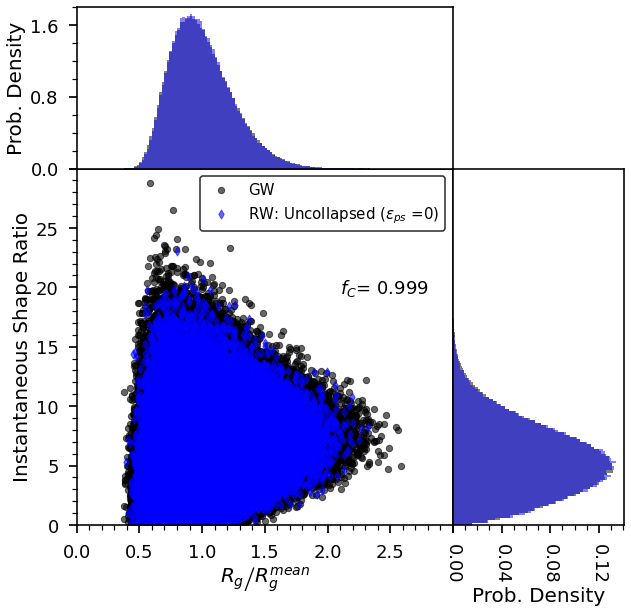

In [50]:
protein_3dplot_against_GW(RW_equil_chain_rg_ree,'RW: Uncollapsed '+r'($\epsilon_{ps}$ =0)','polymer','blue')
plt.savefig('figures/GW_RW_uncollapsed_3dplot.png', dpi = 1000, bbox_inches='tight')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
enter epas value0
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


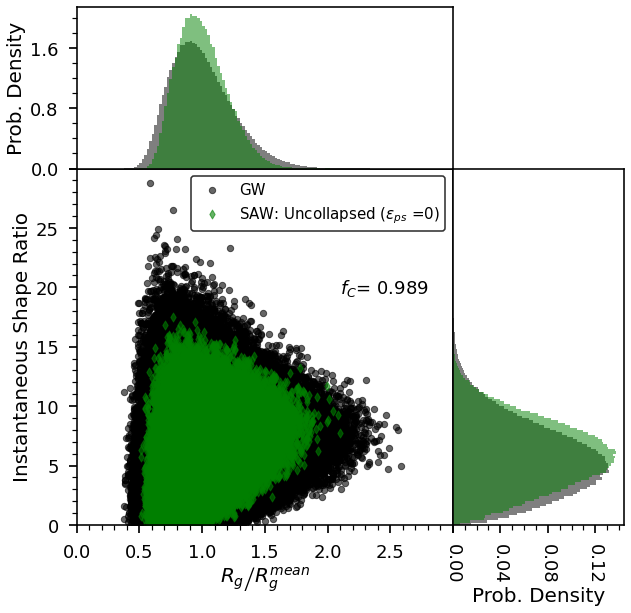

In [51]:
protein_3dplot_against_GW(SAW_equil_chain_rg_ree,'SAW: Uncollapsed '+r'($\epsilon_{ps}$ =0)','polymer','green')
plt.savefig('figures/GW_SAW_uncollapsed_3dplot.png', dpi = 1000, bbox_inches='tight')


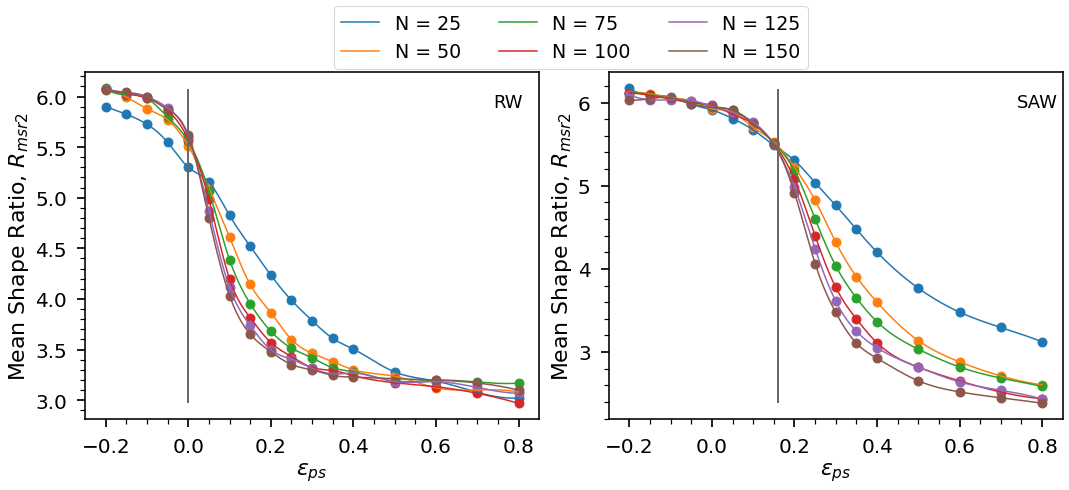

In [78]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
v_line=0.0
line_color='dimgray'
for chain_length in summary_df_RW.chain_length.unique():
    ax[0].scatter(summary_df_RW[summary_df_RW.chain_length==chain_length].epas,
             summary_df_RW[summary_df_RW.chain_length==chain_length].ratio,
              s=80)
    x=np.array(summary_df_RW[summary_df_RW.chain_length==chain_length].epas)
    y=np.array(summary_df_RW[summary_df_RW.chain_length==chain_length].ratio)
    x, y = zip(*sorted(zip(x, y)))
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(min(x), max(x), 500)
    Y_ = X_Y_Spline(X_)
    ax[0].plot(X_, Y_,label='N = '+str(int(chain_length)))

#ax[0].legend(fontsize=19,loc='upper right')
plt.setp(ax[0].get_yticklabels(), fontsize=19)
plt.setp(ax[0].get_xticklabels(), fontsize=19)
ax[0].axvline(v_line,ymin=0.05,ymax=0.95,color=line_color,linewidth=2)
#ax[0].text(0.014,0.2,'x= ~'+str(v_line)+'\n(collapse\nafter this\nthreshold)',
#        fontsize=18,transform=ax[0].transAxes,color=line_color)
ax[0].text(0.9,0.9,'RW',
        fontsize=18,transform=ax[0].transAxes)

ax[0].set_xlabel(r'$\epsilon_{ps}$',fontsize=22)
ax[0].set_ylabel(r'Mean Shape Ratio, $R_{msr2}$',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
del x,y
v_line=0.16
line_color='dimgray'
for chain_length in summary_df_SAW.chain_length.unique():
    ax[1].scatter(summary_df_SAW[summary_df_SAW.chain_length==chain_length].epas,
             summary_df_SAW[summary_df_SAW.chain_length==chain_length].ratio,
              s=80)
    x=np.array(summary_df_SAW[summary_df_SAW.chain_length==chain_length].epas)
    y=np.array(summary_df_SAW[summary_df_SAW.chain_length==chain_length].ratio)
    x, y = zip(*sorted(zip(x, y)))
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(min(x), max(x), 500)
    Y_ = X_Y_Spline(X_)
    ax[1].plot(X_, Y_,label='N = '+str(int(chain_length)))

handles1, labels1 = ax[1].get_legend_handles_labels()
fig.legend(handles1, labels1, fontsize=19,bbox_to_anchor=(0.76,1.15),ncol=3)

plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)
ax[1].axvline(v_line,ymin=0.05,ymax=0.95,color=line_color,linewidth=2)
#ax[1].text(0.14,0.2,'x= ~'+str(v_line)+'\n(collapse\nafter this\nthreshold)',
#        fontsize=18,transform=ax[1].transAxes,color=line_color)
ax[1].text(0.9,0.9,'SAW',
        fontsize=18,transform=ax[1].transAxes)

ax[1].set_xlabel(r'$\epsilon_{ps}$',fontsize=22)
ax[1].set_ylabel(r'Mean Shape Ratio, $R_{msr2}$',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

plt.tight_layout()

plt.savefig('figures/RW_SAW_collapse_epas_vs_ratio.png', dpi = 1000, bbox_inches='tight')



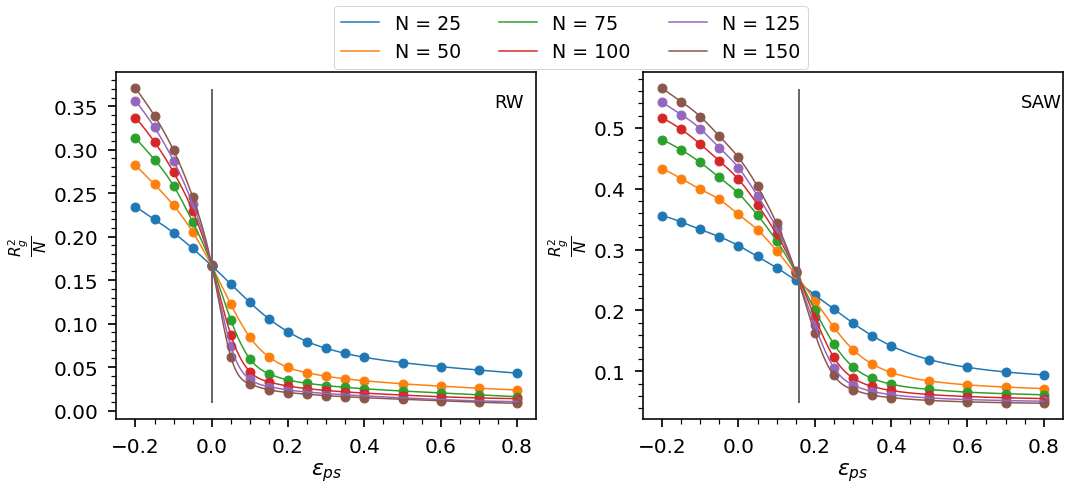

In [53]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
v_line=0.0
line_color='dimgray'
for chain_length in summary_df_RW.chain_length.unique():
    ax[0].scatter(summary_df_RW[summary_df_RW.chain_length==chain_length].epas,
             summary_df_RW[summary_df_RW.chain_length==chain_length].Rg2/chain_length,
              s=80)
    x=np.array(summary_df_RW[summary_df_RW.chain_length==chain_length].epas)
    y=np.array(summary_df_RW[summary_df_RW.chain_length==chain_length].Rg2/chain_length)
    x, y = zip(*sorted(zip(x, y)))
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(min(x), max(x), 500)
    Y_ = X_Y_Spline(X_)
    ax[0].plot(X_, Y_,label='N = '+str(int(chain_length)))

#ax[0].legend(fontsize=19)
plt.setp(ax[0].get_yticklabels(), fontsize=19)
plt.setp(ax[0].get_xticklabels(), fontsize=19)
ax[0].axvline(v_line,ymin=0.05,ymax=0.95,color=line_color,linewidth=2)
#ax[0].text(0.23,0.6,'x= ~'+str(v_line)+'\n(collapse\nafter this\nthreshold)',
#        fontsize=19,transform=ax[0].transAxes,color=line_color)
ax[0].set_xlabel(r'$\epsilon_{ps}$',fontsize=22)
ax[0].set_ylabel(r'$\frac{R_{g}^2}{N}$',fontsize=22)
ax[0].text(0.9,0.9,'RW',
        fontsize=18,transform=ax[0].transAxes)

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5) 

v_line=0.16
line_color='dimgray'
for chain_length in summary_df_SAW.chain_length.unique():
    ax[1].scatter(summary_df_SAW[summary_df_SAW.chain_length==chain_length].epas,
             summary_df_SAW[summary_df_SAW.chain_length==chain_length].Rg2/chain_length,
              s=80)
    x=np.array(summary_df_SAW[summary_df_SAW.chain_length==chain_length].epas)
    y=np.array(summary_df_SAW[summary_df_SAW.chain_length==chain_length].Rg2/chain_length)
    x, y = zip(*sorted(zip(x, y)))
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(min(x), max(x), 500)
    Y_ = X_Y_Spline(X_)
    ax[1].plot(X_, Y_,label='N = '+str(int(chain_length)))

#ax[1].legend(fontsize=19)
handles1, labels1 = ax[1].get_legend_handles_labels()
fig.legend(handles1, labels1, fontsize=19,bbox_to_anchor=(0.76,1.15),ncol=3)


plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)
ax[1].axvline(v_line,ymin=0.05,ymax=0.95,color=line_color,linewidth=2)
#ax[1].text(0.375,0.6,'x= ~'+str(v_line)+'\n(collapse\nafter this\nthreshold)',
#        fontsize=19,transform=ax[1].transAxes,color=line_color)
ax[1].set_xlabel(r'$\epsilon_{ps}$',fontsize=22)
ax[1].set_ylabel(r'$\frac{R_{g}^2}{N}$',fontsize=22)
ax[1].text(0.9,0.9,'SAW',
        fontsize=18,transform=ax[1].transAxes)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

plt.tight_layout()
plt.savefig('figures/RW_SAW_collapse_epas_vs_Rg2_by_N.png', dpi = 1000, bbox_inches='tight')


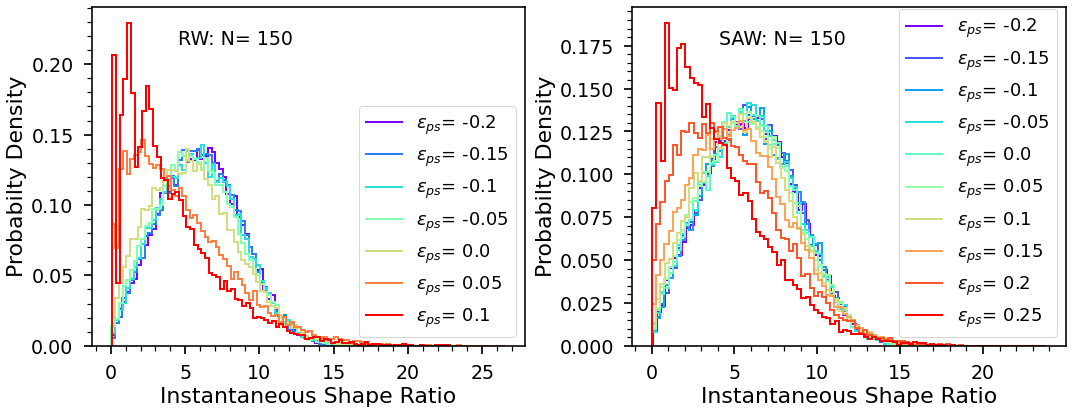

In [79]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
chain_length=150
chain_identity='RW'
testeq=RW_equil_chain_rg_ree.copy().sort_values(by='epas')
epas_cutoff=0.15
RW_handles=[]

color = iter(cm.rainbow(np.linspace(0, 1,
                                   testeq.epas.unique()[testeq.epas.unique()<epas_cutoff].shape[0])))
for epas in testeq.epas.unique():
    if epas<epas_cutoff:
        chosen_color=next(color)    
        ax[0].hist(testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio,
                density=True,color=chosen_color,
                histtype='step',linestyle=('solid'),
               bins=np.arange(testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio.min(),
                             testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio.max(),0.25),
               linewidth=2)
        RW_handles.append(Line2D([0], [0], label=r'$\epsilon_{ps}$= '+str(epas),color=chosen_color,linewidth=2))             


ax[0].text(0.2,0.89,chain_identity+': N= '+str(chain_length),transform=ax[0].transAxes,
        fontsize=19)
ax[0].legend(handles=RW_handles,fontsize=18,loc='lower right')
ax[0].set_ylabel('Probabilty Density',fontsize=22)
ax[0].set_xlabel('Instantaneous Shape Ratio',fontsize=22)
for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
del testeq, chain_length, RW_handles



chain_length=150
chain_identity='SAW'
testeq=SAW_equil_chain_rg_ree.copy().sort_values(by='epas')
epas_cutoff=0.3

SAW_handles=[]

color = iter(cm.rainbow(np.linspace(0, 1,
                                   testeq.epas.unique()[testeq.epas.unique()<epas_cutoff].shape[0])))
for epas in testeq.epas.unique():
    if epas<epas_cutoff:
        chosen_color=next(color)    
        ax[1].hist(testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio,
                label='epas= '+str(epas),density=True,color=chosen_color,
                histtype='step',linestyle=('solid'),
               bins=np.arange(testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio.min(),
                             testeq[(testeq.chain_length==chain_length) & (testeq.epas==epas) ].ratio.max(),0.25),
               linewidth=2)
        SAW_handles.append(Line2D([0], [0], label=r'$\epsilon_{ps}$= '+str(epas),color=chosen_color,linewidth=2))             


ax[1].text(0.2,0.89,chain_identity+': N= '+str(chain_length),transform=ax[1].transAxes,
        fontsize=19)
ax[1].legend(handles=SAW_handles,fontsize=18,loc='lower right')
ax[1].set_ylabel('Probabilty Density',fontsize=22)
ax[1].set_xlabel('Instantaneous Shape Ratio',fontsize=22)
for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

del testeq, chain_length, SAW_handles

plt.tight_layout()
plt.savefig(f'figures/RW_SAW_ratio_collapse_epas_histogram.png', dpi = 1000, bbox_inches='tight')



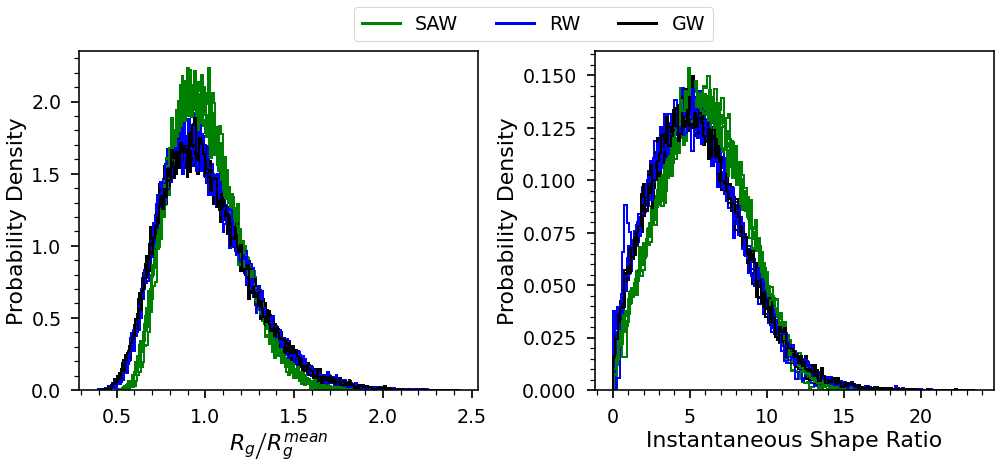

In [55]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
#chain_length=50
every_jth_frame=1
SAW_testeq=SAW_equil_chain_rg_ree.copy()[::every_jth_frame]
RW_testeq=RW_equil_chain_rg_ree.copy()[::every_jth_frame]
GW_testeq=GW_equil_chain_rg_ree.copy()[::every_jth_frame]
color_SAW='green'
color_RW='blue'
color_GW='black'
epas=0



for chain_length in SAW_testeq.chain_length.unique():
    ax[0].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean()),
            label='SAW',
            histtype='step',linestyle=('solid'),density=True,color=color_SAW,
           bins=np.arange((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                         (SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5/((SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
           linewidth=2)
    ax[0].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean()),
            label='RW',
            histtype='step',linestyle=('solid'),density=True,color=color_RW,
           bins=np.arange((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).min(),
                         (RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5/((RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].Rg2**0.5).mean())).max(),0.01),
           linewidth=2)
    ax[0].hist(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values,
            label='GW',
            histtype='step',linestyle=('solid'),density=True,color=color_GW,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.min(),
                         GW_testeq[(GW_testeq.chain_length==chain_length)]['Rg/Rg_mean'].values.max(),0.01),
           linewidth=2)

    
for chain_length in SAW_testeq.chain_length.unique():
    ax[1].hist(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio,
            label='SAW',
            histtype='step',linestyle=('solid'),density=True,color=color_SAW,
           bins=np.arange(SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.min(),
                         SAW_testeq[(SAW_testeq.chain_length==chain_length) & (SAW_testeq.epas==epas) ].ratio.max(),0.15),
           linewidth=2)
    ax[1].hist(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio,
            label='RW',
            histtype='step',linestyle=('solid'),density=True,color=color_RW,
           bins=np.arange(RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.min(),
                         RW_testeq[(RW_testeq.chain_length==chain_length) & (RW_testeq.epas==epas) ].ratio.max(),0.15),
           linewidth=2)
    ax[1].hist(GW_testeq[(GW_testeq.chain_length==chain_length) ].ratio,
            label='GW',
            histtype='step',linestyle=('solid'),density=True,color=color_GW,
           bins=np.arange(GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.min(),
                         GW_testeq[(GW_testeq.chain_length==chain_length)].ratio.max(),0.15),
           linewidth=2)        
    
        
line_SAW=Line2D([0], [0], label='SAW', color=color_SAW,linewidth=3)
line_RW=Line2D([0], [0], label='RW', color=color_RW,linewidth=3)
line_GW=Line2D([0], [0], label='GW', color=color_GW,linewidth=3)
handles=[line_SAW,line_RW,line_GW]


ax[0].set_ylabel('Probability Density',fontsize=22)

label=r'$R_g\left/R_g^{mean}\right.$'
ax[0].set_xlabel(label,fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

ax[1].set_ylabel('Probability Density',fontsize=22)


ax[1].set_xlabel('Instantaneous Shape Ratio',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    

fig.legend(handles=handles,fontsize=19,ncol=3,bbox_to_anchor=(0.72,1.1))

plt.tight_layout()
plt.savefig('figures/Rg_Rg_mean_distribution_ratio_GW_RW_SAW.png', dpi = 1000, bbox_inches='tight')
del SAW_testeq, RW_testeq, GW_testeq


for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW in

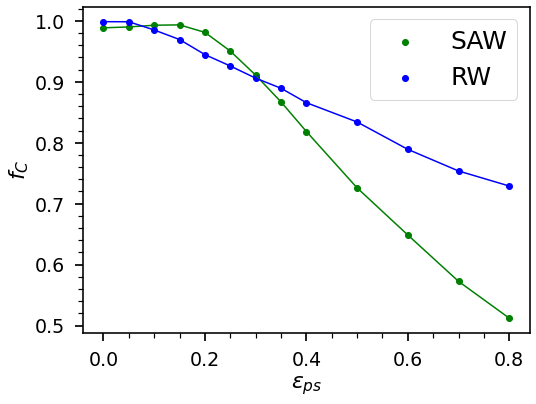

In [77]:
epas=np.sort(RW_equil_chain_rg_ree.epas.unique()[RW_equil_chain_rg_ree.epas.unique()>=0])
fC_list_rw=[]
fC_list_saw=[]
for epa in epas:
    fC_list_rw.append(fA_using_cdist(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==epa],
               'RW',
               'polymer',GW_ind_runs_chainlen100,
               24,RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==epa].shape[0],
               1,0.1))
    fC_list_saw.append(fA_using_cdist(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==epa],
               'SAW',
               'polymer',GW_ind_runs_chainlen100,
               24,SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==epa].shape[0],
               1,0.1))
fig,ax= plt.subplots(figsize=(8,6))    
ax.scatter(epas,fC_list_saw,color='green',label='SAW')
ax.plot(epas,fC_list_saw,color='green')
ax.scatter(epas,fC_list_rw,color='blue',label='RW')
ax.plot(epas,fC_list_rw,color='blue')
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel(r'$\epsilon_{ps}$',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)        
ax.legend(fontsize=25) 
plt.savefig('figures/fC_against_epas_RW_SAW.png', dpi = 1000, bbox_inches='tight')    


# PROTAMINE reduced snapshot protein_against GW data 
# (208000 snapshots)
# if copying chunk of code, careful salmon mentioned at least 3 times

THIS ONLY applies to protamines, due to 520,000 snapshots
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


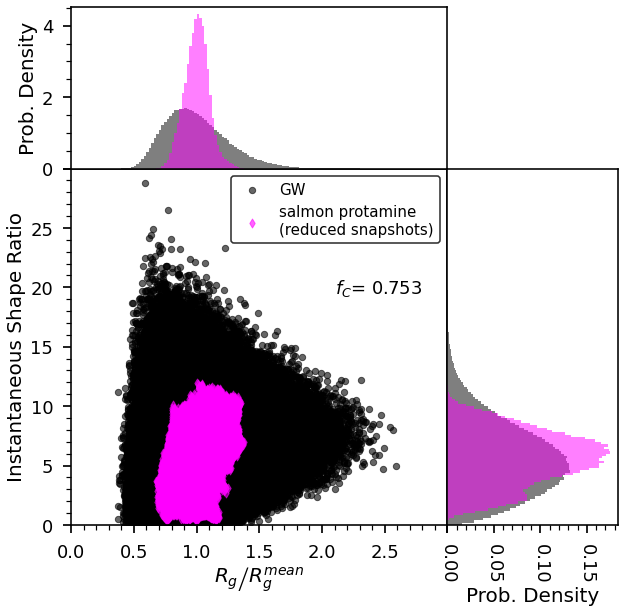

In [105]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=salmon_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=salmon_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protein_3dplot_against_GW(protamine_df,'salmon protamine\n(reduced snapshots)','protein','magenta')
fC_salmon=fC_value

del protamine_df
    
plt.savefig('figures/GW_salmon_3dplot_reduced_snaps.png', dpi = 1000, bbox_inches='tight')    
    

THIS ONLY applies to protamines, due to 520,000 snapshots
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


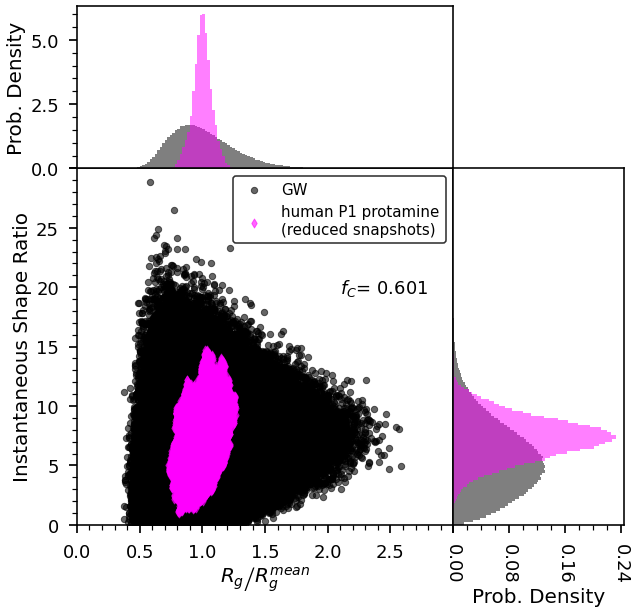

In [106]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=p1_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=p1_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protein_3dplot_against_GW(protamine_df,'human P1 protamine\n(reduced snapshots)','protein','magenta')
fC_p1=fC_value

del protamine_df
    
plt.savefig('figures/GW_p1_3dplot_reduced_snaps.png', dpi = 1000, bbox_inches='tight')    
    

THIS ONLY applies to protamines, due to 520,000 snapshots
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


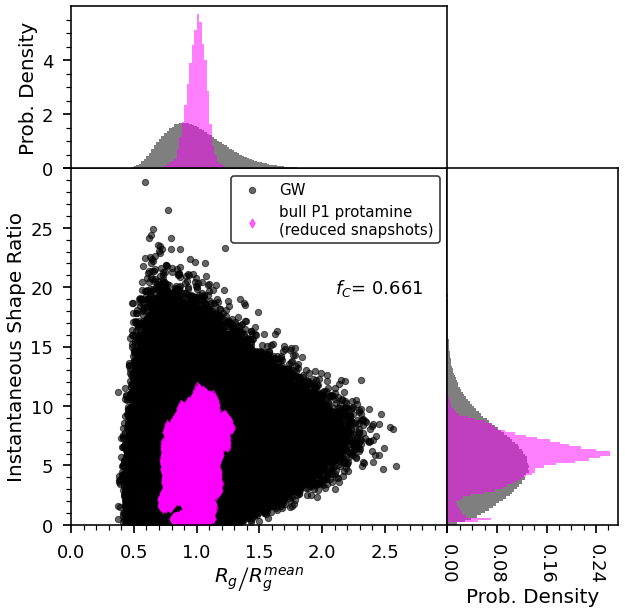

In [115]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=bull_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=bull_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protein_3dplot_against_GW(protamine_df,'bull P1 protamine\n(reduced snapshots)','protein','magenta')
fC_bull=fC_value

del protamine_df
    
plt.savefig('figures/GW_bull_3dplot_reduced_snaps.png', dpi = 1000, bbox_inches='tight')    
    

THIS ONLY applies to protamines, due to 520,000 snapshots
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


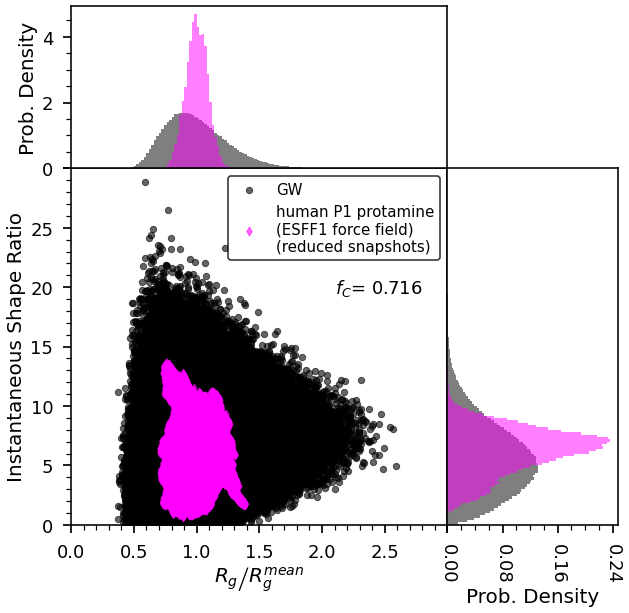

In [61]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=p1_rg_ree_esff1_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=p1_rg_ree_esff1_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]


protein_3dplot_against_GW(p1_rg_ree_esff1_ratheatmap,'human P1 protamine\n(ESFF1 force field)\n(reduced snapshots)',
                          'protein','magenta')


del protamine_df
    
plt.savefig('figures/p1_esff1_3dplot.png', dpi = 1000, bbox_inches='tight')


In [118]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=salmon_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=salmon_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protamine_df_moments=salmon_moments.reset_index(drop=True).copy()
protamine_df_moments=protamine_df_moments[protamine_df_moments.index.isin(running_index)]

print(RSA_based_fC(protamine_df,'salmon','protein',protamine_df_moments,
                       GW_moments_ind_runs_100_,24,protamine_df.shape[0],1,0.1))

del protamine_df, protamine_df_moments


THIS ONLY applies to protamines, due to 520,000 snapshots
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
0.6718194444444444


In [119]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=p1_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=p1_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protamine_df_moments=p1_moments.reset_index(drop=True).copy()
protamine_df_moments=protamine_df_moments[protamine_df_moments.index.isin(running_index)]

print(RSA_based_fC(protamine_df,'p1','protein',protamine_df_moments,
                       GW_moments_ind_runs_100_,24,protamine_df.shape[0],1,0.1))

del protamine_df, protamine_df_moments


THIS ONLY applies to protamines, due to 520,000 snapshots
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
0.363625


In [120]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=bull_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=bull_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protamine_df_moments=bull_moments.reset_index(drop=True).copy()
protamine_df_moments=protamine_df_moments[protamine_df_moments.index.isin(running_index)]

print(RSA_based_fC(protamine_df,'bull','protein',protamine_df_moments,
                       GW_moments_ind_runs_100_,24,protamine_df.shape[0],1,0.1))

del protamine_df, protamine_df_moments


THIS ONLY applies to protamines, due to 520,000 snapshots
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
0.4759777777777778


THIS ONLY applies to protamines, due to 520,000 snapshots
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


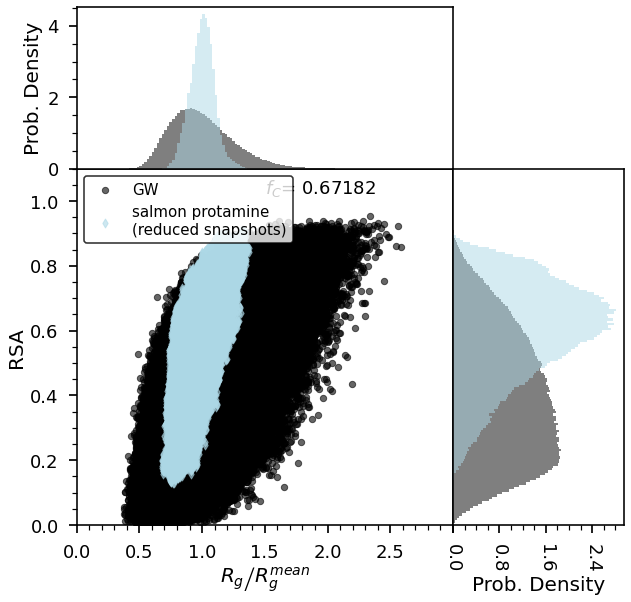

In [137]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=salmon_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1
    

#input which protamine in the immediate next line    
protamine_df=salmon_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

protamine_df_moments=salmon_moments.reset_index(drop=True).copy()
protamine_df_moments=protamine_df_moments[protamine_df_moments.index.isin(running_index)]


scatter_plot_2d_RSA_based(protamine_df,'salmon protamine\n(reduced snapshots)','protein',
                          protamine_df_moments,'lightblue')

del protamine_df,protamine_df_moments

# other proteins (from collaborators) original trajectory protein_against GW data
# (200000 snapshots)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


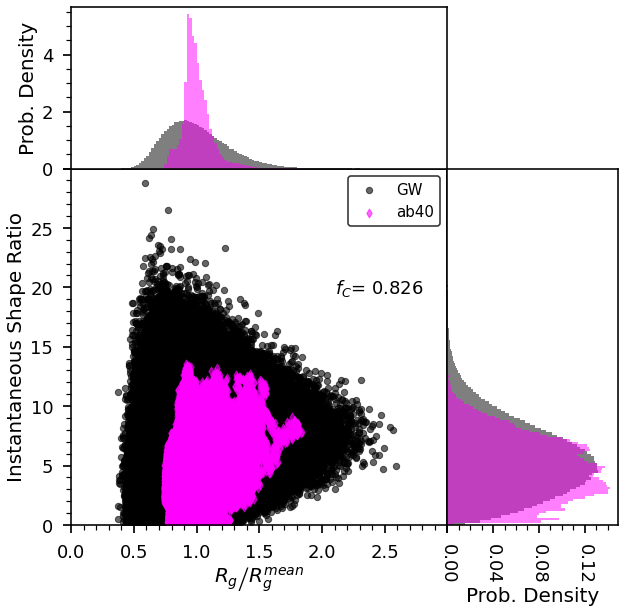

In [109]:
protein_3dplot_against_GW(ab40_ff14sb_rg_ree_ratheatmap_noimage,'ab40','protein','magenta')
fC_ab40_noimage=fC_value
plt.savefig('figures/GW_ab40_3dplot.png', dpi = 1000, bbox_inches='tight')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


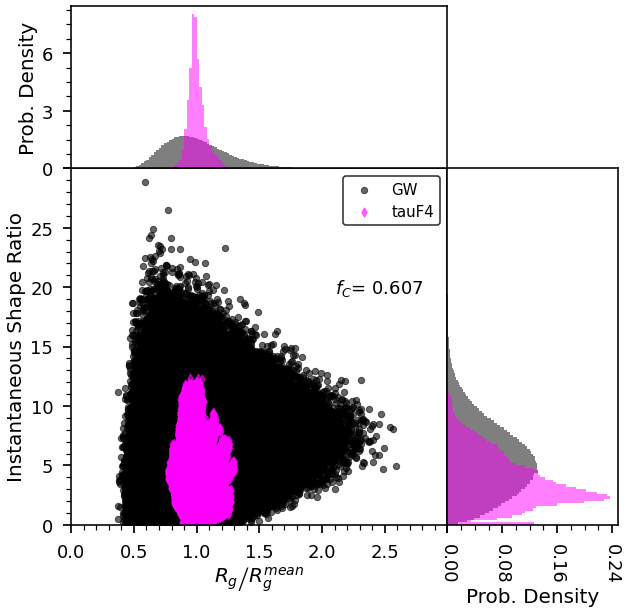

In [110]:
protein_3dplot_against_GW(tauF4_esff1_rg_ree_ratheatmap,'tauF4','protein','magenta')
fC_tauF4=fC_value
plt.savefig('figures/GW_tauF4_3dplot.png', dpi = 1000, bbox_inches='tight')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


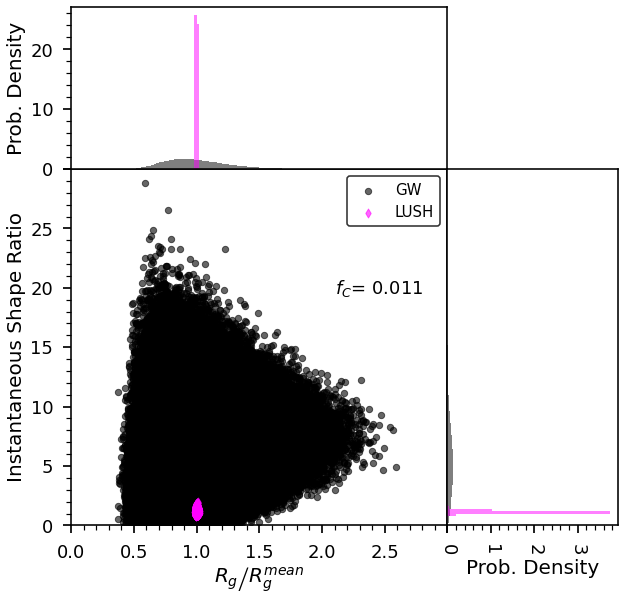

In [111]:
protein_3dplot_against_GW(lush_ESFF1_rg_ree_ratheatmap,'LUSH','protein','magenta')
fC_lush=fC_value
plt.savefig('figures/GW_lush_3dplot.png', dpi = 1000, bbox_inches='tight')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


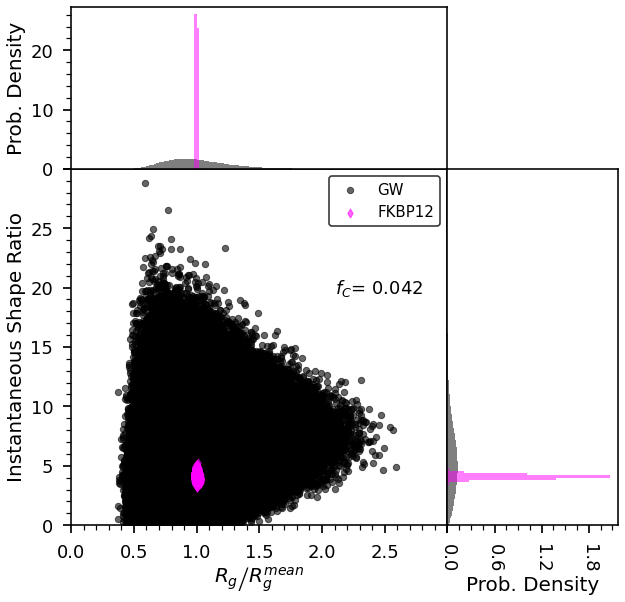

In [112]:
protein_3dplot_against_GW(FKBP12_ESFF1_rg_ree_ratheatmap,'FKBP12','protein','magenta')
fC_FKBP12=fC_value
plt.savefig('figures/GW_FKBP12_3dplot.png', dpi = 1000, bbox_inches='tight')

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


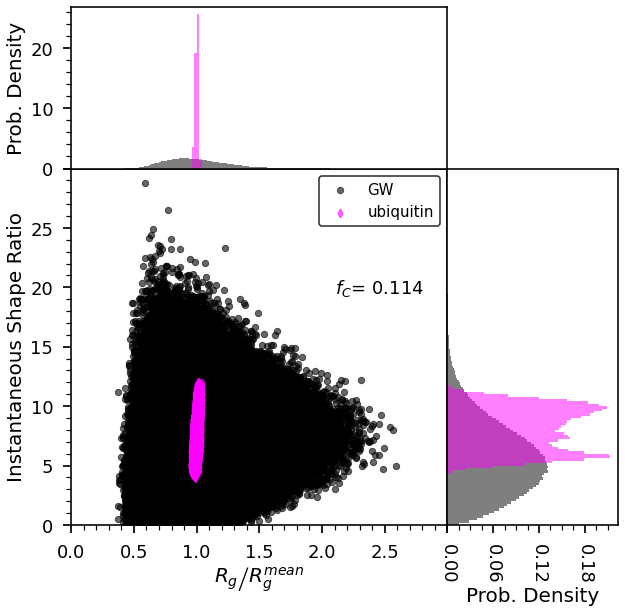

In [113]:
protein_3dplot_against_GW(ubiquitin_ESFF1_rg_ree_ratheatmap,'ubiquitin','protein','magenta')
fC_ubiquitin=fC_value
plt.savefig('figures/GW_ubiquitin_3dplot.png', dpi = 1000, bbox_inches='tight')


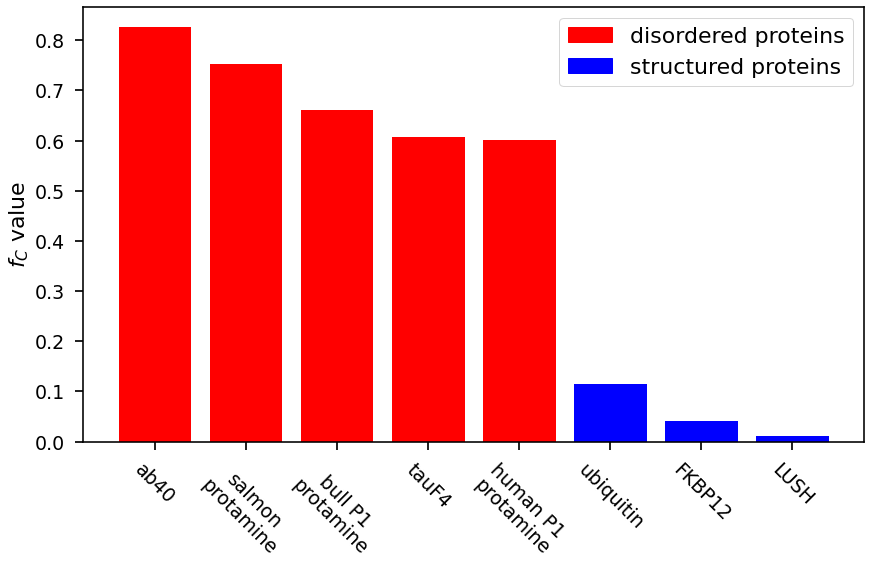

In [119]:
fig, ax = plt.subplots(figsize=(14,8))
fC_list=[fC_lush,fC_FKBP12,fC_ubiquitin,fC_ab40_noimage,fC_tauF4,fC_salmon,fC_bull,fC_p1]
fC_summary_dict=dict()
#MAINTAIN order as above
#(things are manual here double check)
fC_labels=['LUSH','FKBP12','ubiquitin','ab40','tauF4','salmon\nprotamine',
          'bull P1\nprotamine','human P1\nprotamine']
for fC_val,fC_lab in zip(fC_list,fC_labels):
    fC_summary_dict[fC_lab]=fC_val
del fC_list, fC_labels

#sort the fC_values 
fC_summary_dict=dict(sorted(fC_summary_dict.items(), key=lambda x:x[1],reverse=True))

ax.bar(fC_summary_dict.keys(),fC_summary_dict.values(),
       color=['red','red','red','red','red','blue','blue','blue'])

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    

ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,
               pad=10)
ax.tick_params(axis='x', which='major', labelsize=19, width = 1.7, size = 8,
               pad=10,labelrotation=315)


ax.set_ylabel('$f_C$ value',fontsize=22)
#ax.set_xlabel('protein identity',fontsize=22)
colors = {'disordered proteins':'red', 'structured proteins':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,fontsize=22)
#plt.savefig('figures/biophys_poster_fC_summary.png', dpi = 1000, bbox_inches='tight')    
plt.savefig('figures/fC_summary.png', dpi = 1000, bbox_inches='tight')    


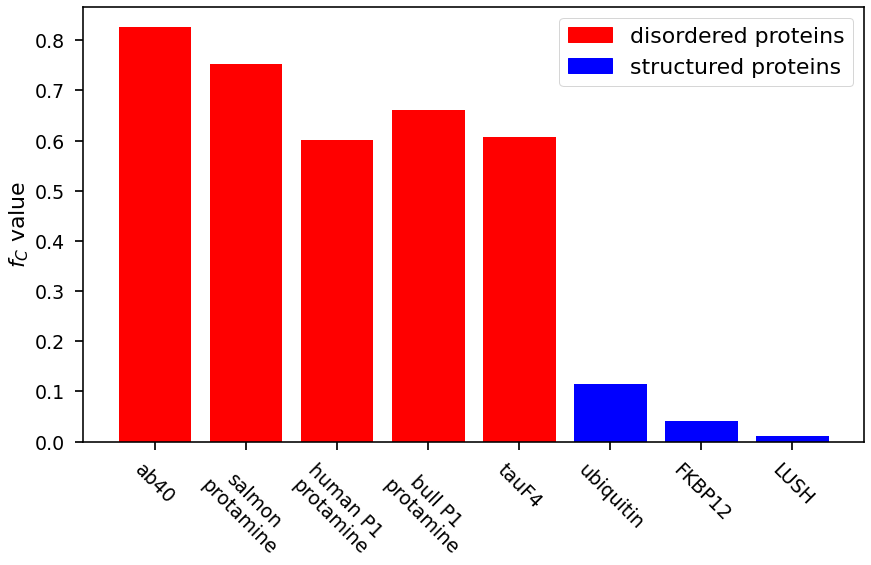

In [118]:
# #this one is of different order
# fig, ax = plt.subplots(figsize=(14,8))
# fC_list=[fC_ab40_noimage,fC_salmon,fC_p1,fC_bull,fC_tauF4,fC_ubiquitin,fC_FKBP12,fC_lush]
# fC_summary_dict=dict()
# #MAINTAIN order as above
# #(things are manual here double check)
# fC_labels=['ab40','salmon\nprotamine','human P1\nprotamine','bull P1\nprotamine','tauF4','ubiquitin',
#           'FKBP12','LUSH']
# for fC_val,fC_lab in zip(fC_list,fC_labels):
#     fC_summary_dict[fC_lab]=fC_val
# del fC_list, fC_labels

# #sort the fC_values 
# #fC_summary_dict=dict(sorted(fC_summary_dict.items(), key=lambda x:x[1],reverse=True))

# ax.bar(fC_summary_dict.keys(),fC_summary_dict.values(),
#        color=['red','red','red','red','red','blue','blue','blue'])

# for i in ['top', 'left', 'right', 'bottom']:
#     ax.spines[i].set_linewidth(1.6)
    

# ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,
#                pad=10)
# ax.tick_params(axis='x', which='major', labelsize=19, width = 1.7, size = 8,
#                pad=10,labelrotation=315)


# ax.set_ylabel('$f_C$ value',fontsize=22)
# #ax.set_xlabel('protein identity',fontsize=22)
# colors = {'disordered proteins':'red', 'structured proteins':'blue'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels,fontsize=22)
# #plt.savefig('figures/biophys_poster_fC_summary.png', dpi = 1000, bbox_inches='tight')    
# #plt.savefig('figures/fC_summary.png', dpi = 1000, bbox_inches='tight')    


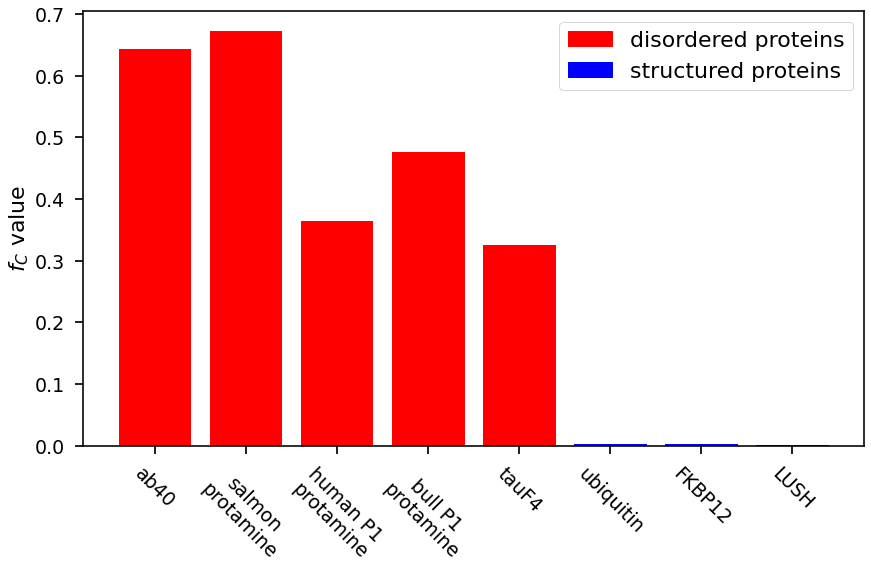

In [121]:
# #this one is of different order
# fig, ax = plt.subplots(figsize=(14,8))
# fC_list=[0.644,0.672,0.364,0.476,0.325,0.0021,0.003,0.0002]
# fC_summary_dict=dict()
# #MAINTAIN order as above
# #(things are manual here double check)
# fC_labels=['ab40','salmon\nprotamine','human P1\nprotamine','bull P1\nprotamine','tauF4','ubiquitin',
#           'FKBP12','LUSH']
# for fC_val,fC_lab in zip(fC_list,fC_labels):
#     fC_summary_dict[fC_lab]=fC_val
# del fC_list, fC_labels

# #sort the fC_values 
# #fC_summary_dict=dict(sorted(fC_summary_dict.items(), key=lambda x:x[1],reverse=True))

# ax.bar(fC_summary_dict.keys(),fC_summary_dict.values(),
#        color=['red','red','red','red','red','blue','blue','blue'])

# for i in ['top', 'left', 'right', 'bottom']:
#     ax.spines[i].set_linewidth(1.6)
    

# ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,
#                pad=10)
# ax.tick_params(axis='x', which='major', labelsize=19, width = 1.7, size = 8,
#                pad=10,labelrotation=315)


# ax.set_ylabel('$f_C$ value',fontsize=22)
# #ax.set_xlabel('protein identity',fontsize=22)
# colors = {'disordered proteins':'red', 'structured proteins':'blue'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels,fontsize=22)
# #plt.savefig('figures/biophys_poster_fC_summary.png', dpi = 1000, bbox_inches='tight')    
# #plt.savefig('figures/fC_summary.png', dpi = 1000, bbox_inches='tight')    


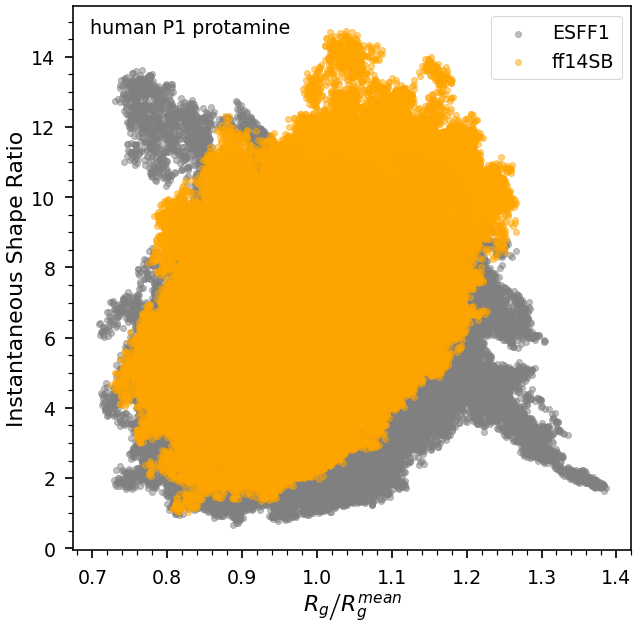

In [60]:
fig,ax=plt.subplots(figsize=(10,10))
for sim in p1_rg_ree_ratheatmap.sim.unique():
    ax.scatter(p1_rg_ree_esff1_ratheatmap[p1_rg_ree_esff1_ratheatmap.sim==sim].Rg.values/p1_rg_ree_esff1_ratheatmap[p1_rg_ree_esff1_ratheatmap.sim==sim].Rg.mean(),
               p1_rg_ree_esff1_ratheatmap[p1_rg_ree_esff1_ratheatmap.sim==sim].ratio,label='ESFF1',color='gray',
              alpha=0.5)
for sim in p1_rg_ree_ratheatmap.sim.unique():
    ax.scatter(p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.sim==sim].Rg.values/p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.sim==sim].Rg.mean(),
               p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.sim==sim].ratio,label='ff14SB',color='orange',alpha=0.5)    
handles,labels=ax.get_legend_handles_labels()
ax.legend([handles[0],handles[13]],[labels[0],labels[13]],fontsize=19)
#plt.setp(ax.get_xticklabels(),fontsize=19)
#plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=22)
ax.set_ylabel('Instantaneous Shape Ratio',fontsize=22)
ax.text(0.03,0.95,'human P1 protamine',
        transform=ax.transAxes,
        fontsize=19)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    
plt.savefig('figures/p1_esff1_ff14sb_comparison.png',dpi=1000,bbox_inches='tight')



# proteins + RSA stuff

moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


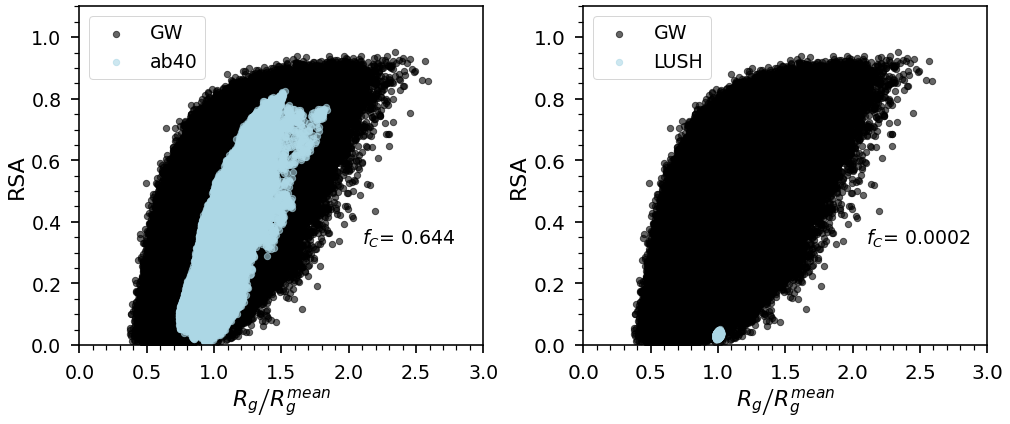

In [108]:
#IMPORTANT: RUN this cell and then the next one SEQUENTIALLY ALWAYS

#ab40 and GW
epas_cutoff=0
testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
testeq_GW_moments=GW_moments_ind_runs_100_[GW_moments_ind_runs_100_.run_number<=24].copy()
testeq_ab40_noimage_ff14sb=ab40_ff14sb_rg_ree_ratheatmap_noimage.copy()
testeq_ab40_noimage_ff14sb_moments=ab40_ff14sb_moments.copy()
x_polmodel_GW=[]
y_polmodel_GW=[]
x_total=[]
y_total=[]
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"

scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

x_polmodel_GW.append(testeq_GW_moments['Rg/Rg_mean'])
y_polmodel_GW.append(testeq_GW_moments['RSA'])
x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))   
y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))   
        
x_total=testeq_ab40_noimage_ff14sb['Rg/Rg_mean']
y_total=testeq_ab40_noimage_ff14sb_moments.RSA.values


#LUSH and GW

epas_cutoff=0
testeq_lush_esff1=lush_ESFF1_rg_ree_ratheatmap.copy()
testeq_lush_esff1_moments=lush_ESFF1_moments.copy()


#drawing figures
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax[0].scatter(x_polmodel_GW,y_polmodel_GW,
           marker=scatter_markers[3],s=40,alpha=0.6,color='black',
           label='GW')
plt.setp(ax[0].get_yticklabels(), fontsize=22)
plt.setp(ax[0].get_xticklabels(), fontsize=22)
        
ax[0].scatter(x_total,y_total,
           marker=scatter_markers[3],s=40,alpha=0.6,color='lightblue',
           label='ab40')
plt.setp(ax[0].get_yticklabels(), fontsize=22)
plt.setp(ax[0].get_xticklabels(), fontsize=22)

#calculating fC
max_value_x=3

max_value_y=1.1

fC_value_ab40_rsa=RSA_based_fC(ab40_ff14sb_rg_ree_ratheatmap_noimage,'ab40','protein',ab40_ff14sb_moments,
                       GW_moments_ind_runs_100_,24,ab40_ff14sb_rg_ree_ratheatmap_noimage.shape[0],1,0.1)
ax[0].text(0.7,0.3,
                   '$f_C$= '+format(fC_value_ab40_rsa,'0.3f'),
                  transform=ax[0].transAxes,fontsize=19)
del fC_value_ab40_rsa


for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
        
     
                

ax[0].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=22)

#ax[0].set_ylabel('Ratio <Ree^2/Rg^2>',fontsize=20)
ax[0].set_ylabel('RSA',fontsize=22)
ax[0].legend(fontsize=19)
ax[0].set_ylim(0,max_value_y)
ax[0].set_xlim(0,max_value_x)

#fig.tight_layout()
#plt.savefig('figures/GW_conformation_landscape.png',dpi=1000,bbox_inches='tight')
del x_total, y_total



scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

ax[1].scatter(x_polmodel_GW,y_polmodel_GW,
           marker=scatter_markers[3],s=40,alpha=0.6,color='black',
           label='GW')
plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)

              
x_total=testeq_lush_esff1['Rg/Rg_mean']
y_total=testeq_lush_esff1_moments.RSA
ax[1].scatter(x_total,y_total,
           marker=scatter_markers[3],s=40,alpha=0.6,color='lightblue',
           label='LUSH')
plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)

#calculating fC
max_value_x=3

max_value_y=1.1

fC_value_lush_rsa=RSA_based_fC(lush_ESFF1_rg_ree_ratheatmap,'LUSH','protein',lush_ESFF1_moments,
                       GW_moments_ind_runs_100_,24,lush_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1)


ax[1].text(0.7,0.3,
                   '$f_C$= '+format(fC_value_lush_rsa,'0.4f'),
                  transform=ax[1].transAxes,fontsize=19)
del fC_value_lush_rsa, x_total,y_total


for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
        
     
                

ax[1].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=22)

#ax[1].set_ylabel('Ratio <Ree^2/Rg^2>',fontsize=20)
ax[1].set_ylabel('RSA',fontsize=22)
ax[1].legend(fontsize=19)
ax[1].set_ylim(0,max_value_y)
ax[1].set_xlim(0,max_value_x)


fig.tight_layout()
plt.savefig('figures/GW_RSA_rg_rg_mean_conformation_landscape_ab40_LUSH.png',dpi=1000,bbox_inches='tight')
del testeq_GW, testeq_lush_esff1, testeq_lush_esff1_moments,testeq_ab40_noimage_ff14sb, testeq_GW_moments, testeq_ab40_noimage_ff14sb_moments



100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


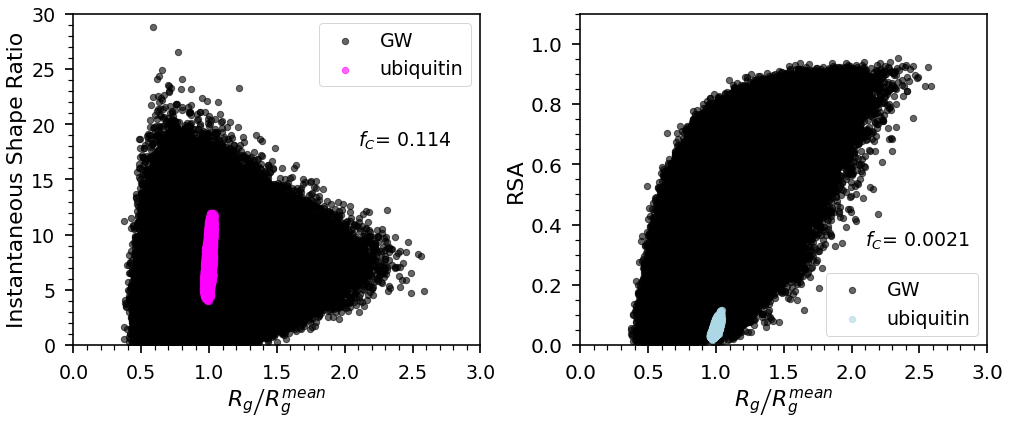

In [112]:


#ubiquitin and GW
epas_cutoff=0
testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
testeq_GW_moments=GW_moments_ind_runs_100_[GW_moments_ind_runs_100_.run_number<=24].copy()
testeq_ubiquitin_esff1=ubiquitin_ESFF1_rg_ree_ratheatmap.copy()
testeq_ubiquitin_esff1_moments=ubiquitin_ESFF1_moments.copy()
x_polmodel_GW=[]
y_polmodel_GW=[]
x_total=[]
y_total=[]
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"

scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'])
y_polmodel_GW.append(testeq_GW['ratio'])
x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))   
y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))   

        
x_total=testeq_ubiquitin_esff1['Rg/Rg_mean']
y_total=testeq_ubiquitin_esff1.ratio.values

#now plotting figures

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax[0].scatter(x_polmodel_GW,y_polmodel_GW,
           marker=scatter_markers[3],s=40,alpha=0.6,color='black',
           label='GW')
plt.setp(ax[0].get_yticklabels(), fontsize=22)
plt.setp(ax[0].get_xticklabels(), fontsize=22)
        
ax[0].scatter(x_total,y_total,
           marker=scatter_markers[3],s=40,alpha=0.6,color='magenta',
           label='ubiquitin')
plt.setp(ax[0].get_yticklabels(), fontsize=22)
plt.setp(ax[0].get_xticklabels(), fontsize=22)

#calculating fC
max_value_x=3
max_value_y=30
fC_value_ubiquitin=fA_using_cdist(ubiquitin_ESFF1_rg_ree_ratheatmap,
               'ubiquitin',
               'protein',GW_ind_runs_chainlen100,
               24,ubiquitin_ESFF1_rg_ree_ratheatmap.shape[0],
               1,0.1)


ax[0].text(0.7,0.6,
                   '$f_C$= '+format(fC_value_ubiquitin,'0.3f'),
                  transform=ax[0].transAxes,fontsize=19)

del fC_value_ubiquitin

for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
        
     
                

ax[0].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=22)

#ax[0].set_ylabel('Ratio <Ree^2/Rg^2>',fontsize=20)
ax[0].set_ylabel('Instantaneous Shape Ratio',fontsize=22)
ax[0].legend(fontsize=19,loc='upper right')
ax[0].set_ylim(0,max_value_y)
ax[0].set_xlim(0,max_value_x)

del x_polmodel_GW,y_polmodel_GW,x_total,y_total

#ubiquitin RSA recalculating GW 

x_polmodel_GW=[]
y_polmodel_GW=[]

x_polmodel_GW.append(testeq_GW_moments['Rg/Rg_mean'])
y_polmodel_GW.append(testeq_GW_moments['RSA'])
x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))   
y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))   
    
    
scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

ax[1].scatter(x_polmodel_GW,y_polmodel_GW,
           marker=scatter_markers[3],s=40,alpha=0.6,color='black',
           label='GW')
plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)

x_total=testeq_ubiquitin_esff1['Rg/Rg_mean']
y_total=testeq_ubiquitin_esff1_moments.RSA.values


ax[1].scatter(x_total,y_total,
           marker=scatter_markers[3],s=40,alpha=0.6,color='lightblue',
           label='ubiquitin')
plt.setp(ax[1].get_yticklabels(), fontsize=19)
plt.setp(ax[1].get_xticklabels(), fontsize=19)


#calculating fC
max_value_x=3

max_value_y=1.1

fC_value_ubiquitin_rsa=RSA_based_fC(ubiquitin_ESFF1_rg_ree_ratheatmap,'ubiquitin','protein',ubiquitin_ESFF1_moments,
                       GW_moments_ind_runs_100_,24,ubiquitin_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1)


ax[1].text(0.7,0.3,
                   '$f_C$= '+format(fC_value_ubiquitin_rsa,'0.4f'),
                  transform=ax[1].transAxes,fontsize=19)
del fC_value_ubiquitin_rsa, x_total,y_total



for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
        
     
                

ax[1].set_xlabel(r'$R_g\left/R_g^{mean}\right.$',fontsize=22)

#ax[1].set_ylabel('Ratio <Ree^2/Rg^2>',fontsize=20)
ax[1].set_ylabel('RSA',fontsize=22)
ax[1].legend(fontsize=19,loc='lower right')
ax[1].set_ylim(0,max_value_y)
ax[1].set_xlim(0,max_value_x)


fig.tight_layout()
plt.savefig('figures/GW_ratio_RSA_rg_rg_mean_conformation_ubiquitin_diff.png',dpi=1000,bbox_inches='tight')
del testeq_GW, testeq_GW_moments,testeq_ubiquitin_esff1,testeq_ubiquitin_esff1_moments


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


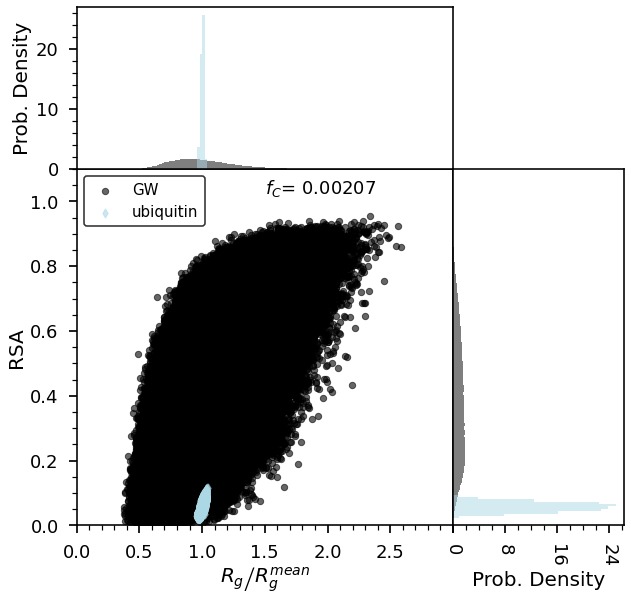

In [83]:
scatter_plot_2d_RSA_based(ubiquitin_ESFF1_rg_ree_ratheatmap,'ubiquitin','protein',ubiquitin_ESFF1_moments,'lightblue')
plt.savefig('figures/GW_ubiquitin_RSA.png',dpi=1000,bbox_inches='tight')

In [113]:
RSA_based_fC(tauF4_esff1_rg_ree_ratheatmap,'tauF4','protein',tauF4_esff1_moments,
                       GW_moments_ind_runs_100_,24,tauF4_esff1_rg_ree_ratheatmap.shape[0],1,0.1)

moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


0.3248013888888889

In [114]:
RSA_based_fC(FKBP12_ESFF1_rg_ree_ratheatmap,'FKBP12','protein',FKBP12_ESFF1_moments,
                       GW_moments_ind_runs_100_,24,FKBP12_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1)

moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


0.003202777777777778

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


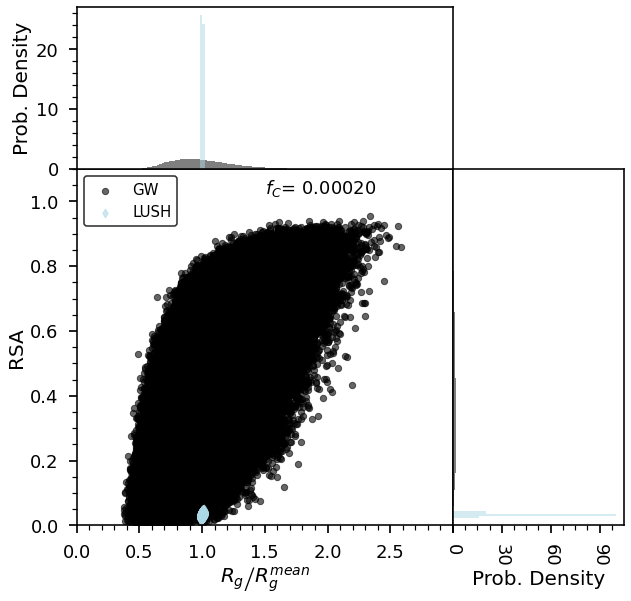

In [135]:
scatter_plot_2d_RSA_based(lush_ESFF1_rg_ree_ratheatmap,'LUSH','protein',lush_ESFF1_moments,'lightblue')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


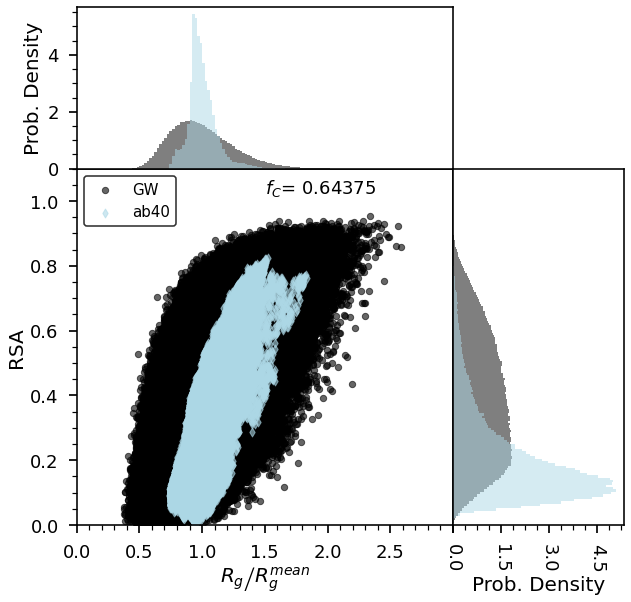

In [136]:
scatter_plot_2d_RSA_based(ab40_ff14sb_rg_ree_ratheatmap_noimage,'ab40','protein',ab40_ff14sb_moments,'lightblue')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


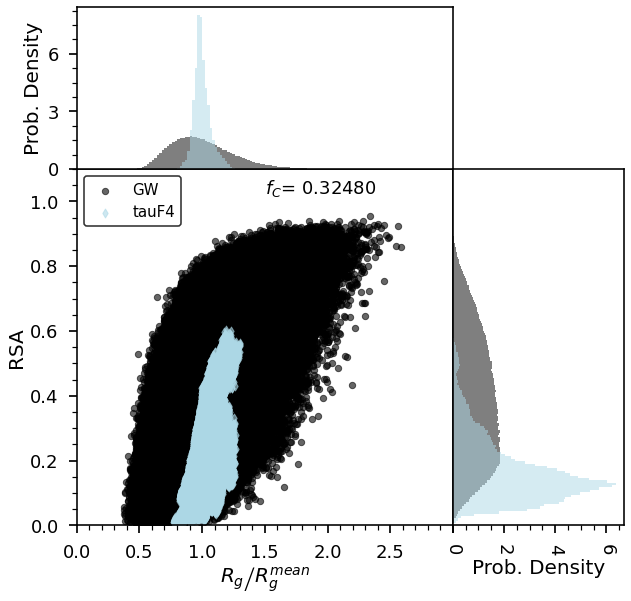

In [138]:
scatter_plot_2d_RSA_based(tauF4_esff1_rg_ree_ratheatmap,'tauF4','protein',tauF4_esff1_moments,'lightblue')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


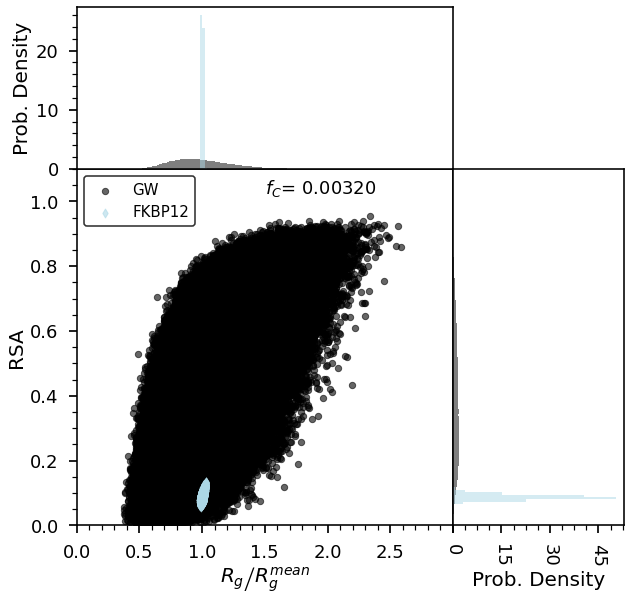

In [139]:
scatter_plot_2d_RSA_based(FKBP12_ESFF1_rg_ree_ratheatmap,'FKBP12','protein',FKBP12_ESFF1_moments,'lightblue')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


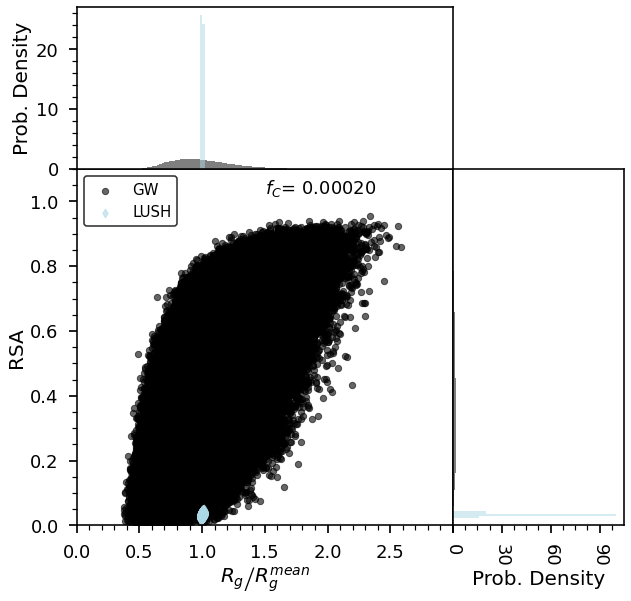

In [148]:
scatter_plot_2d_RSA_based(lush_ESFF1_rg_ree_ratheatmap,'LUSH','protein',lush_ESFF1_moments,'lightblue')

In [79]:
GW_moments_ind_runs_100_.corr(method='pearson')['Rg/Rg_mean']

run_number       4.627881e-17
chain_length              NaN
Rg2              9.866414e-01
Rend2            7.817068e-01
ratio            2.353486e-01
R1               9.624771e-01
R2               3.793277e-01
R3               1.822391e-01
Rg               9.999791e-01
Rg_mean          1.159457e-17
Rg/Rg_mean       1.000000e+00
asphericity      9.358647e-01
acylindricity    3.382692e-01
RSA              6.955129e-01
Name: Rg/Rg_mean, dtype: float64

# more figures (mainly pei stuff)

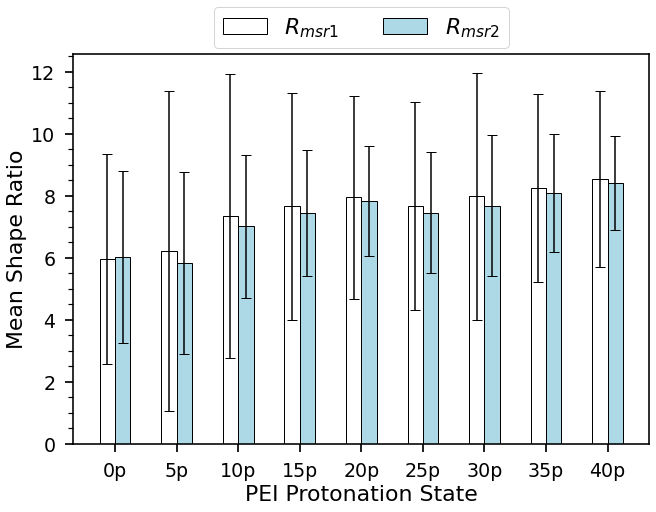

In [43]:
# data from https://allisonhorst.github.io/palmerpenguins/
#careful about selecting and replacing all
pei_ratheatmap['Rg2']=pei_ratheatmap.Rg.values**2
pei_ratheatmap['Ree2']=pei_ratheatmap.Ree.values**2
labels=[]
pei_meanratio_rs0=[]
pei_meanratio_rs0_error=[]
pei_meanratio_rs1=[]
pei_meanratio_rs1_error=[]
for proton in pei_ratheatmap.proton.unique():
    labels.append(str(proton)+'p')
    pei_meanratio_rs0.append((pei_ratheatmap[pei_ratheatmap.proton==proton].Ree2.values).mean()/(pei_ratheatmap[pei_ratheatmap.proton==proton].Rg2.values).mean())
    # error propagation formula from https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html
    #first need to do error propagation for mean/mean (rs0) formula
    del_x_by_x=pei_ratheatmap[pei_ratheatmap.proton==proton]['Ree2'].std()/pei_ratheatmap[pei_ratheatmap.proton==proton]['Ree2'].mean()    
    del_x_by_x_sq=del_x_by_x**2
    del_y_by_y=pei_ratheatmap[pei_ratheatmap.proton==proton]['Rg2'].std()/pei_ratheatmap[pei_ratheatmap.proton==proton]['Rg2'].mean()    
    del_y_by_y_sq=del_y_by_y**2
    propagated_error_rs0=((del_x_by_x_sq+del_y_by_y_sq)**0.5)*(pei_ratheatmap[pei_ratheatmap.proton==proton]['Ree2'].mean()/pei_ratheatmap[pei_ratheatmap.proton==proton]['Rg2'].mean())
    pei_meanratio_rs0_error.append(propagated_error_rs0)    
    pei_meanratio_rs1.append(pei_ratheatmap[pei_ratheatmap.proton==proton].ratio.values.mean())
    pei_meanratio_rs1_error.append(pei_ratheatmap[pei_ratheatmap.proton==proton].ratio.values.std())        

#combining two definitions
pei_meanratio_combined={r'$R_{msr1}$':pei_meanratio_rs0,
                       r'$R_{msr2}$':pei_meanratio_rs1}
pei_meanratio_combined_error={r'$R_{msr1}$':pei_meanratio_rs0_error,
                       r'$R_{msr2}$':pei_meanratio_rs1_error}

hatches_list= ['||', '\/', '|*', '/o', '+o', 'x*', 'o-', 'O|', 'O.', '*-']    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color_binary_list=['white','lightblue']
fig, ax = plt.subplots(layout='constrained',figsize=(9,7))

for attribute, measurement in pei_meanratio_combined.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   measurement,
                   width,
                   yerr=list(pei_meanratio_combined_error.values())[multiplier],
                   label=attribute,capsize=5,zorder=0,#,hatch=hatches_list[multiplier]
                  color=color_binary_list[multiplier%2], edgecolor='black')
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('PEI Protonation State',fontsize=22)
ax.set_ylabel('Mean Shape Ratio',fontsize=22)
#ax.set_title('Penguin attributes by labels')
ax.set_xticks(x + (0.5*width) , labels,fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator())
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)    
ax.tick_params(axis='x', which='minor', bottom=False)

#keeping legend but will crop out from manuscript document and write it in the figure caption. 
ax.legend(fontsize=22,ncol=len(pei_meanratio_combined.keys()),
          bbox_to_anchor=(0.5, 1.15),loc='upper center')
plt.savefig('figures/pei_mean_ratio_both_def_combined.png',dpi=1000,bbox_inches='tight')





for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI 

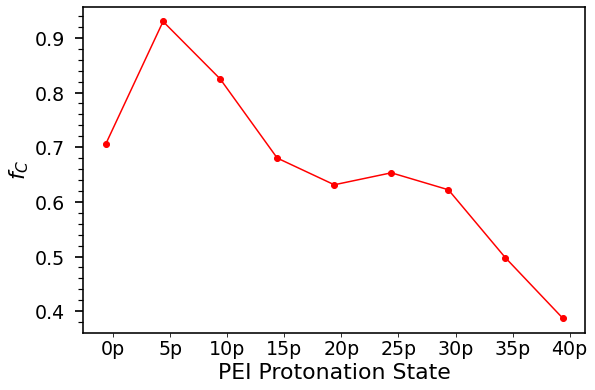

In [56]:
labels=[str(proton_state)+'p' for proton_state in pei_ratheatmap.proton.unique()]
proton_list=[int(proton.split('p')[0]) for proton in labels]
fC_list_protonstates=[]

for proton in proton_list:
    fC_list_protonstates.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
                                                   'PEI','pei',GW_ind_runs_chainlen100,
                                                   24,pei_ratheatmap[pei_ratheatmap.proton==proton].shape[0],
                                               1,0.1))


fig,ax= plt.subplots(figsize=(9,6))    
ax.scatter(labels,fC_list_protonstates,color='red')
ax.plot(labels,fC_list_protonstates,color='red')
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('PEI Protonation State',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
x = np.arange(len(labels))
width = 0.25
ax.set_xticks(x + (0.5*width) , labels,fontsize=19)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        

plt.savefig('figures/fC_against_proton_states_pei.png', dpi = 1000, bbox_inches='tight')    


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
6000

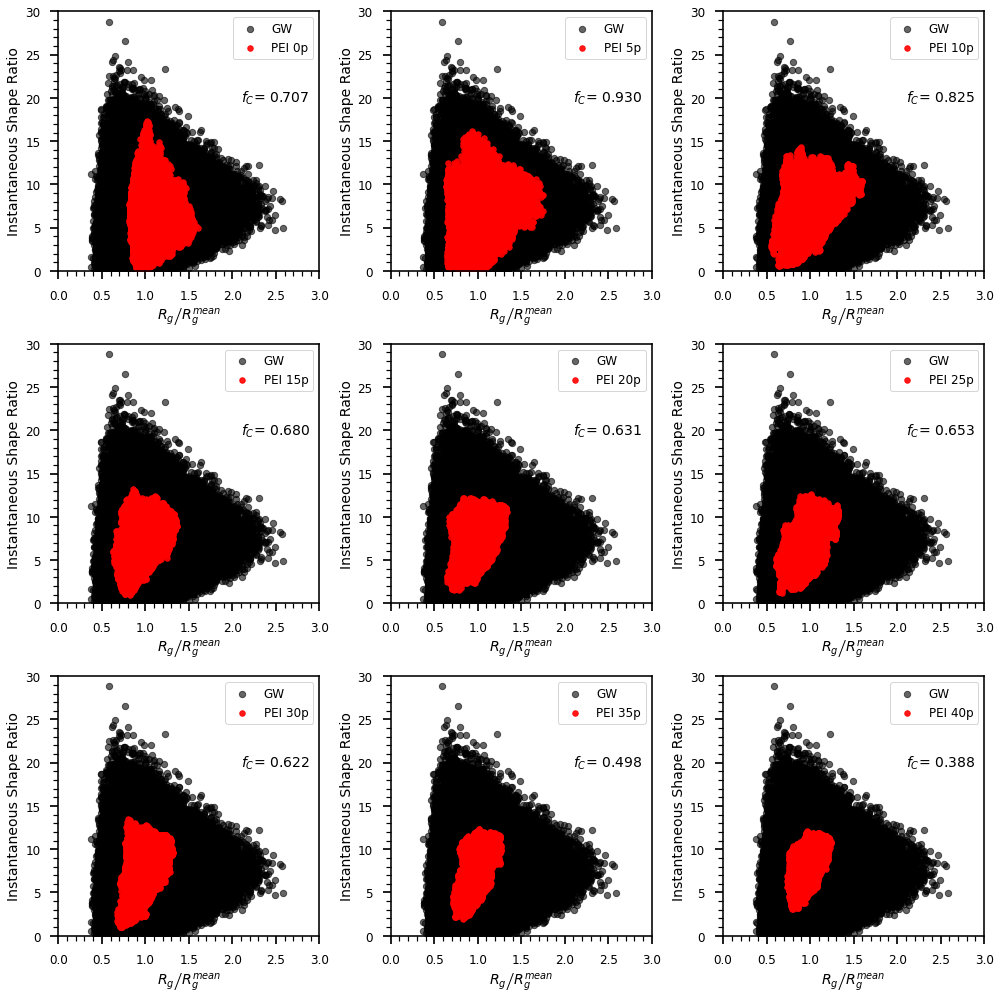

In [71]:

epas_cutoff=0
testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()

testeq_pei=pei_ratheatmap.copy()

x_polmodel_GW=[]
y_polmodel_GW=[]
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]
proton_list=testeq_pei.proton.unique()

x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
y_polmodel_GW.append(testeq_GW.ratio.values)
y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

# x_considered=testeq_pei['Rg/Rg_mean'].values
# x_considered=list(x_considered)
# y_considered=testeq_pei_moments.ratio.values
# y_considered=list(y_considered)
# step_x=0.02
# step_y=0.2
max_value_x=3
max_value_y=30


for  proton,ax in zip(proton_list, axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.scatter(x_polmodel_GW,y_polmodel_GW,
               marker=scatter_markers[3],s=40,alpha=0.6,color='black',
               label='GW')
    x_considered=testeq_pei[testeq_pei.proton==proton]['Rg/Rg_mean'].values
    y_considered=testeq_pei[testeq_pei.proton==proton].ratio.values
    ax.scatter(x_considered,
               y_considered,
               marker=scatter_markers[3],s=30,alpha=0.9,color='red',
                                      label='PEI '+str(proton)+'p')     
    #calculating fA
#     n_divisions_x=round((max_value_x-testeq_GW['Rg/Rg_mean'].min())/step_x)


#     n_divisions_y=round((max_value_y-testeq_GW['ratio'].min())/step_y)
#     gridx = np.linspace(testeq_GW['Rg/Rg_mean'].min(), max_value_x, n_divisions_x)


#     gridy = np.linspace(testeq_GW['ratio'].min(), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_considered, y_considered, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    #calculating fC
    
    fC_value=fA_using_cdist(testeq_pei[testeq_pei.proton==proton],
                   'PEI',
                   'pei',GW_ind_runs_chainlen100,
                   24,testeq_pei[testeq_pei.proton==proton].shape[0],
                   1,0.1)
    
    ax.text(0.7,0.65,
                       '$f_C$= '+format(fC_value,'0.3f'),
                      transform=ax.transAxes,fontsize=14)
    del fC_value
    # chart formatting
    #ax.set_title('PEI protonation '+str(proton)+'p',fontsize=15)
    #ax.get_legend().remove()
    ax.set_xlabel(r'$R_g\left/R_g^{mean}\right.$' ,fontsize=14)
    ax.set_ylabel('Instantaneous Shape Ratio',fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=12)
    plt.setp(ax.get_xticklabels(), fontsize=12)
    ax.set_ylim(0,max_value_y)
    ax.set_xlim(0,max_value_x)
    if testeq_GW['Rg/Rg_mean'].max()>max_value_x or testeq_GW['Rg/Rg_mean'].min()<0:
        print('ERROR')
        break
    elif max(x_considered)>max_value_x or min(x_considered)<0:
        print('ERROR')        
        break
    elif testeq_GW['ratio'].max()>max_value_y or testeq_GW['ratio'].min()<0:
        print('ERROR')
        break    
    elif max(y_considered)>max_value_y or min(y_considered)<0:
        print('ERROR')        
        break    
    #ax.set_ylim(testeq_pei_moments[testeq_pei_moments.proton.isin(proton_list)].ratio.min(),
    #        testeq_pei_moments[testeq_pei_moments.proton.isin(proton_list)].ratio.max())
    #ax.set_xlim(testeq_pei[testeq_pei.proton.isin(proton_list)]['Rg/Rg_mean'].min(),
    #           testeq_pei[testeq_pei.proton.isin(proton_list)]['Rg/Rg_mean'].max())

    for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', labelsize=12, width = 1.7, size = 8,pad=10)
    ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    
    ax.legend(loc='upper right',fontsize=12)

fig.tight_layout()
plt.savefig('figures/PEI_conformational_landscape_every_proton_state.png',dpi=1000,bbox_inches='tight')
del testeq_GW, testeq_pei


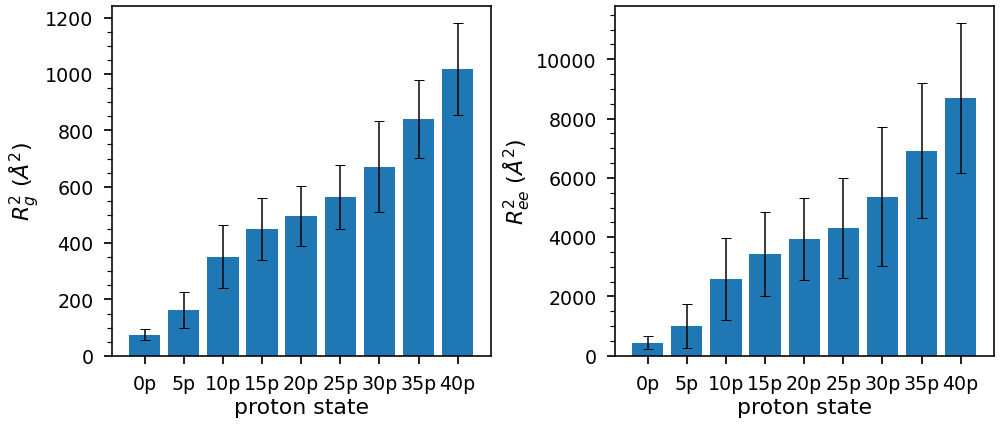

In [65]:
#DO NOT use find and replace (or be careful)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))


labels=[]
pei_meanratio=[]
pei_meanratio_error=[]
for proton in pei_ratheatmap.proton.unique():
    labels.append(str(proton)+'p')
    pei_meanratio.append((pei_ratheatmap[pei_ratheatmap.proton==proton].Rg.values**2).mean())
    pei_meanratio_error.append((pei_ratheatmap[pei_ratheatmap.proton==proton].Rg.values**2).std())    
x = np.arange(len(labels))

ax[0].bar(x,pei_meanratio,yerr=pei_meanratio_error,capsize=5)
ax[0].set_xticks(x)
ax[0].set_xlabel('proton state',fontsize=22)
ax[0].set_ylabel(r'$R_{g}^2$'+' ('+ r'$\AA^2$'+')',fontsize=22)
plt.setp(ax[0].get_yticklabels(),fontsize=19)
ax[0].set_xticklabels(labels,fontsize=19)
for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)
    
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='y', which='minor', width = 1.2, size = 5)    
ax[0].tick_params(axis='x', which='minor', bottom=False)



labels=[]
pei_meanratio=[]
pei_meanratio_error=[]
for proton in pei_ratheatmap.proton.unique():
    labels.append(str(proton)+'p')
    pei_meanratio.append((pei_ratheatmap[pei_ratheatmap.proton==proton].Ree.values**2).mean())
    pei_meanratio_error.append((pei_ratheatmap[pei_ratheatmap.proton==proton].Ree.values**2).std())    
x = np.arange(len(labels))

ax[1].bar(x,pei_meanratio,yerr=pei_meanratio_error,capsize=5)
ax[1].set_xticks(x)
ax[1].set_xlabel('proton state',fontsize=22)
ax[1].set_ylabel(r'$R_{ee}^2$'+' ('+ r'$\AA^2$'+')',fontsize=22)
ax[1].set_xticklabels(labels,fontsize=19)
plt.setp(ax[1].get_yticklabels(),fontsize=19)
for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='y', which='minor', width = 1.2, size = 5)    
ax[1].tick_params(axis='x', which='minor', bottom=False)

fig.tight_layout()
plt.savefig('figures/PEI_Rg2_Ree2_every_proton_state.png',dpi=1000,bbox_inches='tight')
